In [222]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [223]:
%%R
data_folder = './'
setwd(data_folder)

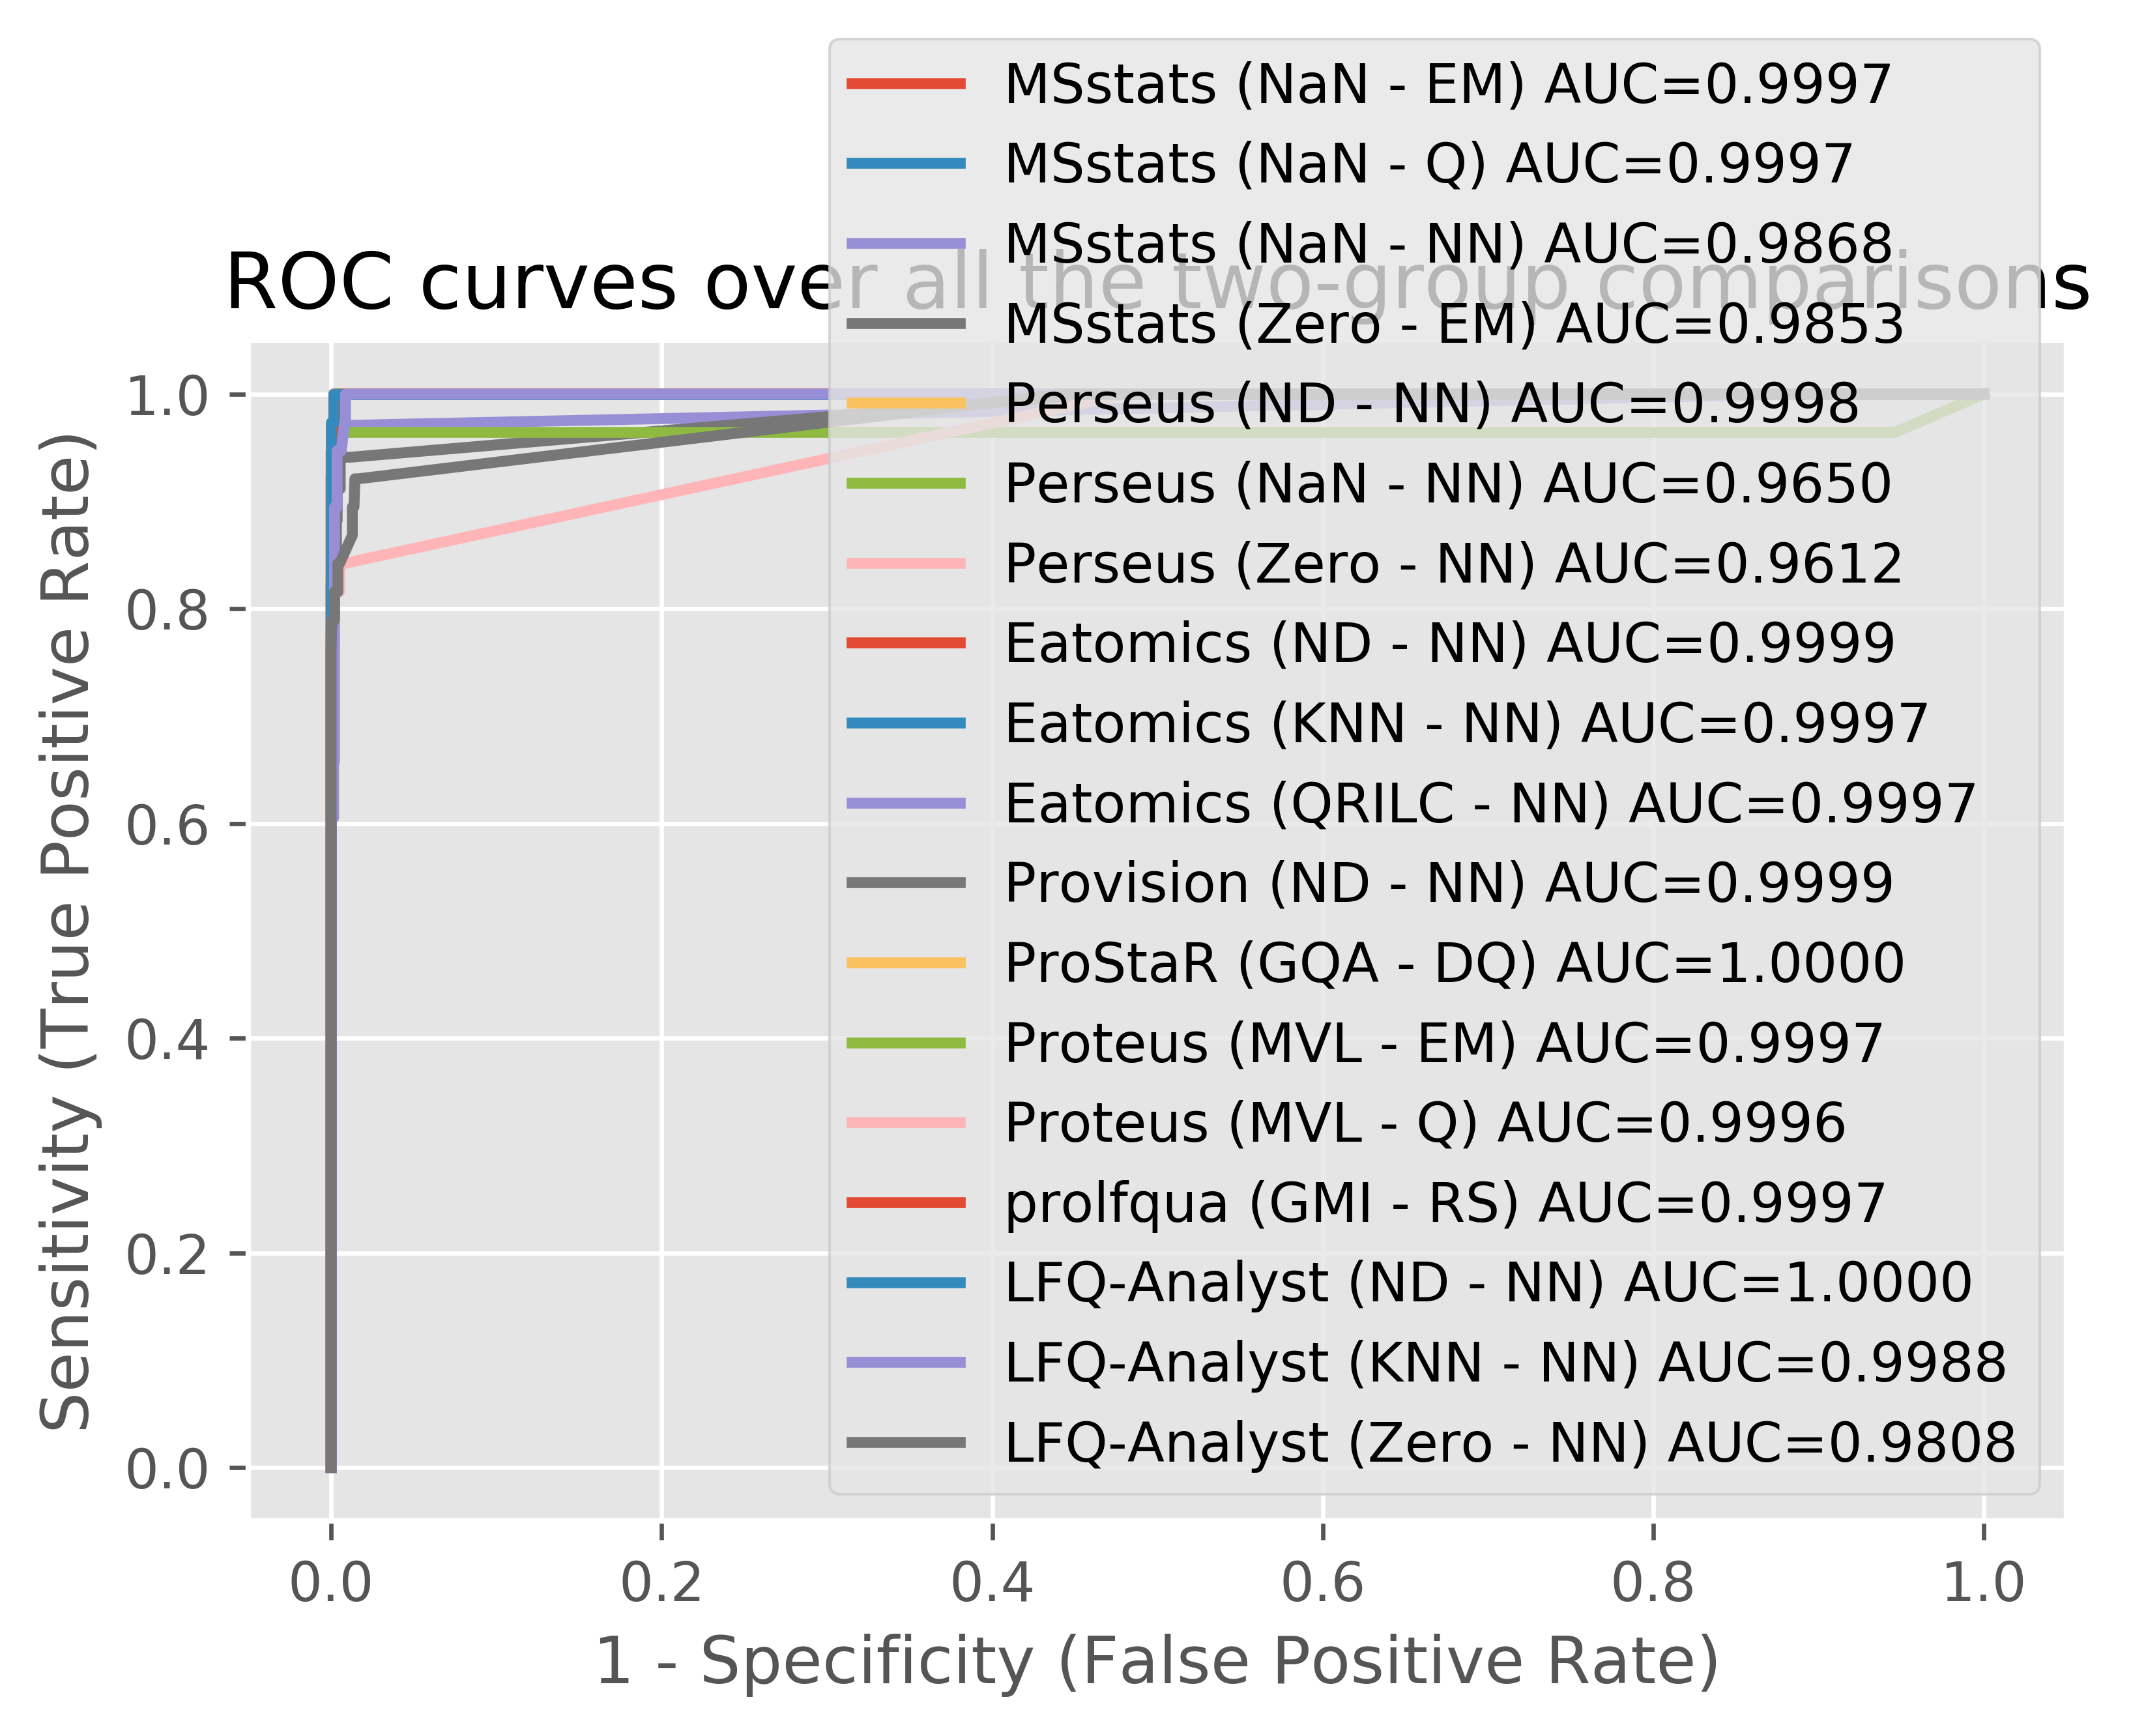

In [211]:
from sklearn import metrics
import pandas as pd
import re
from matplotlib import pyplot as plt


auc_data = pd.DataFrame(columns=["fpr", "tpr", "auc", "combination"])

no_difference_ups = ["P00167", "P01133", "P02144", "P04040", "P15559", "P62937", "P63165",  "Q06830"]

difference_ups =  ["P01579", "O76070", "P63279", "P68871","P01127", "P01008", "P62988", "P10599", "P02787", "P99999", "P12081", "P51965","P10636-8", 
       "P01031", "P09211", "P02788", "P41159", "O00762", "P05413", "P00441", "P00918", "P08758", "P00915", "P01344", "P69905", 
        "P00709", "P55957", "P08263", "P61769", "P10145", "P16083", "P61626", "P02741", "P06732",
        "P01375", "P06396", "P02753", "P01112", "Q15843", "P02768"]

# MSstats
MSstats_output_equalizeMedians = pd.read_csv("./MSstats/MSstats_output_equalizeMedians.csv", header=0, sep=",", index_col=0)
MSstats_output_equalizeMedians.dropna(subset=["log2FC", "pvalue"], how="any", inplace=True)

def distinguish_truth(row):
    if "Protein" in row:
        if re.search("|".join(difference_ups), row["Protein"]):
            return 1
        else:
            return 0
    elif "Majority protein IDs" in row:
        if re.search("|".join(difference_ups), row["Majority protein IDs"]):
            return 1
        else:
            return 0
    elif "UniprotID" in row:
        if re.search("|".join(difference_ups), row["UniprotID"]):
            return 1
        else:
            return 0
    elif "Protein_IDs" in row:
        if re.search("|".join(difference_ups), row["Protein_IDs"]):
            return 1
        else:
            return 0
    elif "protein" in row:
        if re.search("|".join(difference_ups), row["protein"]):
            return 1
        else:
            return 0
    elif "protein_Id" in row:
        if re.search("|".join(difference_ups), row["protein_Id"]):
            return 1
        else:
            return 0
    elif "Protein IDs" in row:
        if re.search("|".join(difference_ups), row["Protein IDs"]):
            return 1
        else:
            return 0
MSstats_output_equalizeMedians['value'] = 1 - MSstats_output_equalizeMedians['adj.pvalue']
MSstats_output_equalizeMedians['y'] = MSstats_output_equalizeMedians.apply(lambda x: distinguish_truth(x), axis=1)
MSstats_output_equalizeMedians = MSstats_output_equalizeMedians.sort_values(by="value", ascending=False)
MSstats_output_equalizeMedians.head()

fpr, tpr, thresholds = metrics.roc_curve(MSstats_output_equalizeMedians['y'].tolist(), MSstats_output_equalizeMedians['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "MSstats (NaN - EM)"}, ignore_index=True)
MSstats_output_equalizeMedians.rename(columns={"log2FC": "Log2FC", "adj.pvalue": "Adj P.value"}, inplace=True)


# plt.plot(fpr, tpr, color="darkorange", lw=2, label="AUC = %0.2f" % auc)
# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.title("ROC curves over all the two-group comparisons")
# plt.xlabel("1 - Specificity (False Positive Rate)")
# plt.ylabel("Sensitivity (True Positive Rate)")
# plt.legend(loc="lower right")


MSstats_output_quantile = pd.read_csv("./MSstats/MSstats_output_quantile.csv", header=0, sep=",", index_col=0)
MSstats_output_quantile.dropna(subset=["log2FC", "pvalue"], how="any", inplace=True)
MSstats_output_quantile['value'] = 1 - MSstats_output_quantile['adj.pvalue']
MSstats_output_quantile['y'] = MSstats_output_quantile.apply(lambda x: distinguish_truth(x), axis=1)
MSstats_output_quantile = MSstats_output_quantile.sort_values(by="value", ascending=False)
MSstats_output_quantile.head()
fpr, tpr, thresholds = metrics.roc_curve(MSstats_output_quantile['y'].tolist(), MSstats_output_quantile['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "MSstats (NaN - Q)"}, ignore_index=True)
MSstats_output_quantile.rename(columns={"log2FC": "Log2FC", "adj.pvalue": "Adj P.value"}, inplace=True)


MSstats_output_FALSE = pd.read_csv("./MSstats/MSstats_output_FALSE.csv", header=0, sep=",", index_col=0)
MSstats_output_FALSE.dropna(subset=["log2FC", "pvalue"], how="any", inplace=True)
MSstats_output_FALSE['value'] = 1 - MSstats_output_FALSE['adj.pvalue']
MSstats_output_FALSE['y'] = MSstats_output_FALSE.apply(lambda x: distinguish_truth(x), axis=1)
MSstats_output_FALSE = MSstats_output_FALSE.sort_values(by="value", ascending=False)
MSstats_output_FALSE.rename(columns={"log2FC": "Log2FC", "adj.pvalue": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(MSstats_output_FALSE['y'].tolist(), MSstats_output_FALSE['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "MSstats (NaN - NN)"}, ignore_index=True)


MSstats_output_inputation0 = pd.read_csv("./MSstats/MSstats_output_inputation0.csv", header=0, sep=",", index_col=0)
MSstats_output_inputation0.dropna(subset=["log2FC", "pvalue"], how="any", inplace=True)
MSstats_output_inputation0['value'] = 1 - MSstats_output_inputation0['adj.pvalue']
MSstats_output_inputation0['y'] = MSstats_output_inputation0.apply(lambda x: distinguish_truth(x), axis=1)
MSstats_output_inputation0 = MSstats_output_inputation0.sort_values(by="value", ascending=False)
MSstats_output_inputation0.rename(columns={"log2FC": "Log2FC", "adj.pvalue": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(MSstats_output_inputation0['y'].tolist(), MSstats_output_inputation0['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "MSstats (Zero - EM)"}, ignore_index=True)


# Perseus
perseus_no_normalization_imputation_normal_distribution = pd.read_csv("./perseus/perseus_no_normalization_imputation_normal_distribution.txt", header=0, sep="\t")
perseus_no_normalization_imputation_normal_distribution.dropna(subset=["Student's T-test Difference 1_2", "Student's T-test q-value 1_2"], how="any", inplace=True)
perseus_no_normalization_imputation_normal_distribution['value'] = 1 - perseus_no_normalization_imputation_normal_distribution["Student's T-test q-value 1_2"]
perseus_no_normalization_imputation_normal_distribution['y'] = perseus_no_normalization_imputation_normal_distribution.apply(lambda x: distinguish_truth(x), axis=1)
perseus_no_normalization_imputation_normal_distribution = perseus_no_normalization_imputation_normal_distribution.sort_values(by="value", ascending=False)
perseus_no_normalization_imputation_normal_distribution.rename(columns={'Majority protein IDs': 'Protein', "Student's T-test Difference 1_2": "Log2FC", "Student's T-test q-value 1_2": "Adj P.value"}, inplace=True)

fpr, tpr, thresholds = metrics.roc_curve(perseus_no_normalization_imputation_normal_distribution['y'].tolist(), perseus_no_normalization_imputation_normal_distribution['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Perseus (ND - NN)"}, ignore_index=True)


no_normalization_imputation_NaN = pd.read_csv("./perseus/no_normalization_imputation_NaN.txt", header=0, sep="\t")
no_normalization_imputation_NaN.dropna(subset=["Student's T-test Difference 1_2", "Student's T-test q-value 1_2"], how="any", inplace=True)
no_normalization_imputation_NaN['value'] = 1 - no_normalization_imputation_NaN["Student's T-test q-value 1_2"]
no_normalization_imputation_NaN['y'] = no_normalization_imputation_NaN.apply(lambda x: distinguish_truth(x), axis=1)
no_normalization_imputation_NaN = no_normalization_imputation_NaN.sort_values(by="value", ascending=False)
no_normalization_imputation_NaN.rename(columns={'Majority protein IDs': 'Protein'}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(no_normalization_imputation_NaN['y'].tolist(), no_normalization_imputation_NaN['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Perseus (NaN - NN)"}, ignore_index=True)
no_normalization_imputation_NaN.rename(columns={'Majority protein IDs': 'Protein', "Student's T-test Difference 1_2": "Log2FC", "Student's T-test q-value 1_2": "Adj P.value"}, inplace=True)


perseus_no_normalization_imputation_0 = pd.read_csv("./perseus/perseus_no_normalization_imputation_0.txt", header=0, sep="\t")
perseus_no_normalization_imputation_0.dropna(subset=["Student's T-test Difference 1_2", "Student's T-test q-value 1_2"], how="any", inplace=True)
perseus_no_normalization_imputation_0['value'] = 1 - perseus_no_normalization_imputation_0["Student's T-test q-value 1_2"]
perseus_no_normalization_imputation_0['y'] = perseus_no_normalization_imputation_0.apply(lambda x: distinguish_truth(x), axis=1)
perseus_no_normalization_imputation_0 = perseus_no_normalization_imputation_0.sort_values(by="value", ascending=False)
perseus_no_normalization_imputation_0.rename(columns={'Majority protein IDs': 'Protein', "Student's T-test Difference 1_2": "Log2FC", "Student's T-test q-value 1_2": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(perseus_no_normalization_imputation_0['y'].tolist(), perseus_no_normalization_imputation_0['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Perseus (Zero - NN)"}, ignore_index=True)


# Eatomics
eatomics_imputation_perseus_like = pd.read_excel("./eatomics/eatomics_imputation_perseus_like.txt", header=0, sheet_name="Downregulated.Proteins")
Upregulated_Proteins = pd.read_excel("./eatomics/eatomics_imputation_perseus_like.txt", header=0, sheet_name="Upregulated.Proteins")
eatomics_imputation_perseus_like = eatomics_imputation_perseus_like.append(Upregulated_Proteins, ignore_index=True)
eatomics_imputation_perseus_like.dropna(subset=["adj.P.Val", "logFC"], how="any", inplace=True)
eatomics_imputation_perseus_like['value'] = 1 - eatomics_imputation_perseus_like["adj.P.Val"]
eatomics_imputation_perseus_like['y'] = eatomics_imputation_perseus_like.apply(lambda x: distinguish_truth(x), axis=1)
eatomics_imputation_perseus_like = eatomics_imputation_perseus_like.sort_values(by="value", ascending=False)
eatomics_imputation_perseus_like.head()
eatomics_imputation_perseus_like.rename(columns={"Majority protein IDs": "Protein", "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(eatomics_imputation_perseus_like['y'].tolist(), eatomics_imputation_perseus_like['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Eatomics (ND - NN)"}, ignore_index=True)



eatomics_imputation_knn = pd.read_excel("./eatomics/eatomics_imputation_knn.csv", header=0, sheet_name="Downregulated.Proteins")
Upregulated_Proteins = pd.read_excel("./eatomics/eatomics_imputation_knn.csv", header=0, sheet_name="Upregulated.Proteins")
eatomics_imputation_knn = eatomics_imputation_knn.append(Upregulated_Proteins, ignore_index=True)
eatomics_imputation_knn.dropna(subset=["adj.P.Val", "logFC"], how="any", inplace=True)
eatomics_imputation_knn['value'] = 1 - eatomics_imputation_knn["adj.P.Val"]
eatomics_imputation_knn['y'] = eatomics_imputation_knn.apply(lambda x: distinguish_truth(x), axis=1)
eatomics_imputation_knn = eatomics_imputation_knn.sort_values(by="value", ascending=False)
eatomics_imputation_knn.head()
eatomics_imputation_knn.rename(columns={"Majority protein IDs": "Protein", "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(eatomics_imputation_knn['y'].tolist(), eatomics_imputation_knn['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Eatomics (KNN - NN)"}, ignore_index=True)


eatomics_imputation_QRILC = pd.read_excel("./eatomics/eatomics_imputation_QRILC.csv", header=0, sheet_name="Downregulated.Proteins")
Upregulated_Proteins = pd.read_excel("./eatomics/eatomics_imputation_QRILC.csv", header=0, sheet_name="Upregulated.Proteins")
eatomics_imputation_QRILC = eatomics_imputation_QRILC.append(Upregulated_Proteins, ignore_index=True)
eatomics_imputation_QRILC.dropna(subset=["adj.P.Val", "logFC"], how="any", inplace=True)
eatomics_imputation_QRILC['value'] = 1 - eatomics_imputation_QRILC["adj.P.Val"]
eatomics_imputation_QRILC['y'] = eatomics_imputation_QRILC.apply(lambda x: distinguish_truth(x), axis=1)
eatomics_imputation_QRILC = eatomics_imputation_QRILC.sort_values(by="value", ascending=False)
eatomics_imputation_QRILC.head()
eatomics_imputation_QRILC.rename(columns={"Majority protein IDs": "Protein", "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(eatomics_imputation_QRILC['y'].tolist(), eatomics_imputation_QRILC['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Eatomics (QRILC - NN)"}, ignore_index=True)



# Provision
imputation_normal_distribution_no_normalization = pd.read_csv("./provision/imputation_normal_distribution_no_normalization.txt", header=0, sep="\t")
imputation_normal_distribution_no_normalization['value'] = 1 - imputation_normal_distribution_no_normalization["qValue"]
imputation_normal_distribution_no_normalization['y'] = imputation_normal_distribution_no_normalization.apply(lambda x: distinguish_truth(x), axis=1)
imputation_normal_distribution_no_normalization = imputation_normal_distribution_no_normalization.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(imputation_normal_distribution_no_normalization['y'].tolist(), imputation_normal_distribution_no_normalization['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Provision (ND - NN)"}, ignore_index=True)
imputation_normal_distribution_no_normalization.rename(columns={'UniprotID': 'Protein', "EffectSize": "Log2FC", "qValue": "Adj P.value"}, inplace=True)



# ProstaR
ProStaR_global_quantile_alignment_det_quantile = pd.read_excel("./ProStaR/ProStaR_normalization_global_quantile_alignment_inputation_det_quantile.xlsx", header=0)
ProStaR_global_quantile_alignment_det_quantile = ProStaR_global_quantile_alignment_det_quantile[-ProStaR_global_quantile_alignment_det_quantile["Protein_IDs"].str.contains("CON_|REV_")]
ProStaR_global_quantile_alignment_det_quantile.dropna(subset=["logFC (UPS1_vs_UPS2)", "P_Value (UPS1_vs_UPS2)"], how="any", inplace=True)
ProStaR_global_quantile_alignment_det_quantile['value'] = 1 - ProStaR_global_quantile_alignment_det_quantile["P_Value (UPS1_vs_UPS2)"]
ProStaR_global_quantile_alignment_det_quantile['y'] = ProStaR_global_quantile_alignment_det_quantile.apply(lambda x: distinguish_truth(x), axis=1)
ProStaR_global_quantile_alignment_det_quantile = ProStaR_global_quantile_alignment_det_quantile.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(ProStaR_global_quantile_alignment_det_quantile['y'].tolist(), ProStaR_global_quantile_alignment_det_quantile['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "ProStaR (GQA - DQ)"}, ignore_index=True)
ProStaR_global_quantile_alignment_det_quantile.rename(columns={'Protein_IDs': 'Protein', "logFC (UPS1_vs_UPS2)": "Log2FC", "P_Value (UPS1_vs_UPS2)": "Adj P.value"}, inplace=True)


# Proteus
proteus_median = pd.read_csv("./proteus/proteus_median.csv", header=0, sep=",", index_col=0)
proteus_median.dropna(subset=["logFC", "P.Value"], how="any", inplace=True)
proteus_median['value'] = 1 - proteus_median["adj.P.Val"]
proteus_median['y'] = proteus_median.apply(lambda x: distinguish_truth(x), axis=1)
proteus_median = proteus_median.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(proteus_median['y'].tolist(), proteus_median['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Proteus (MVL - EM)"}, ignore_index=True)
proteus_median.rename(columns={'protein': 'Protein', "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)


proteus_normalizeQuantiles = pd.read_csv("./proteus/proteus_normalizeQuantiles.csv", header=0, sep=",", index_col=0)
proteus_normalizeQuantiles.dropna(subset=["logFC", "P.Value"], how="any", inplace=True)
proteus_normalizeQuantiles['value'] = 1 - proteus_normalizeQuantiles["adj.P.Val"]
proteus_normalizeQuantiles['y'] = proteus_normalizeQuantiles.apply(lambda x: distinguish_truth(x), axis=1)
proteus_normalizeQuantiles = proteus_normalizeQuantiles.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(proteus_normalizeQuantiles['y'].tolist(), proteus_normalizeQuantiles['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Proteus (MVL - Q)"}, ignore_index=True)
proteus_normalizeQuantiles.rename(columns={'protein': 'Protein', "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)



# prolfqua
WaldTest_moderated = pd.read_csv("./prolfqua/prolfqua-WaldTest_moderated.csv", header=0, sep=",", index_col=0)
WaldTest_moderated.dropna(subset=["diff", "p.value"], how="any", inplace=True)
WaldTest_moderated = WaldTest_moderated[-WaldTest_moderated["protein_Id"].str.contains("CON_")]
WaldTest_moderated = WaldTest_moderated[-WaldTest_moderated["protein_Id"].str.contains("REV_")]
WaldTest_moderated['value'] = 1 - WaldTest_moderated["FDR"]
WaldTest_moderated['y'] = WaldTest_moderated.apply(lambda x: distinguish_truth(x), axis=1)
WaldTest_moderated = WaldTest_moderated.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(WaldTest_moderated['y'].tolist(), WaldTest_moderated['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "prolfqua (GMI - RS)"}, ignore_index=True)
WaldTest_moderated.rename(columns={'protein_Id': 'Protein', "diff": "Log2FC", "FDR": "Adj P.value"}, inplace=True)


# LFQ-analyte
Results_imputationPerseustype = pd.read_csv("./lfq/Results_imputationPerseustype.csv", header=0, sep=",")
Results_imputationPerseustype.dropna(subset=["UPS1_vs_UPS2_log2 fold change", "UPS1_vs_UPS2_p.adj"], how="any", inplace=True)
Results_imputationPerseustype['value'] = 1 - Results_imputationPerseustype["UPS1_vs_UPS2_p.adj"]
Results_imputationPerseustype['y'] = Results_imputationPerseustype.apply(lambda x: distinguish_truth(x), axis=1)
Results_imputationPerseustype = Results_imputationPerseustype.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(Results_imputationPerseustype['y'].tolist(), Results_imputationPerseustype['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "LFQ-Analyst (ND - NN)"}, ignore_index=True)
Results_imputationPerseustype.rename(columns={'Protein IDs': 'Protein', "UPS1_vs_UPS2_log2 fold change": "Log2FC", "UPS1_vs_UPS2_p.adj": "Adj P.value"}, inplace=True)


Results_imputationKNN = pd.read_csv("./lfq/Results_imputationKNN.csv", header=0, sep=",")
Results_imputationKNN.dropna(subset=["UPS1_vs_UPS2_log2 fold change", "UPS1_vs_UPS2_p.adj"], how="any", inplace=True)
Results_imputationKNN['value'] = 1 - Results_imputationKNN["UPS1_vs_UPS2_p.adj"]
Results_imputationKNN['y'] = Results_imputationKNN.apply(lambda x: distinguish_truth(x), axis=1)
Results_imputationKNN = Results_imputationKNN.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(Results_imputationKNN['y'].tolist(), Results_imputationKNN['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "LFQ-Analyst (KNN - NN)"}, ignore_index=True)
Results_imputationKNN.rename(columns={'Protein IDs': 'Protein', "UPS1_vs_UPS2_log2 fold change": "Log2FC", "UPS1_vs_UPS2_p.adj": "Adj P.value"}, inplace=True)


Results_imputation0 = pd.read_csv("./lfq/Results_imputation0.csv", header=0, sep=",")
Results_imputation0.dropna(subset=["UPS1_vs_UPS2_log2 fold change", "UPS1_vs_UPS2_p.adj"], how="any", inplace=True)
Results_imputation0['value'] = 1 - Results_imputation0["UPS1_vs_UPS2_p.adj"]
Results_imputation0['y'] = Results_imputation0.apply(lambda x: distinguish_truth(x), axis=1)
Results_imputation0 = Results_imputation0.sort_values(by="value", ascending=False)
fpr, tpr, thresholds = metrics.roc_curve(Results_imputation0['y'].tolist(), Results_imputation0['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "LFQ-Analyst (Zero - NN)"}, ignore_index=True)
Results_imputation0.rename(columns={'Protein IDs': 'Protein', "UPS1_vs_UPS2_log2 fold change": "Log2FC", "UPS1_vs_UPS2_p.adj": "Adj P.value"}, inplace=True)



plt.figure(dpi=600)
# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("ROC curves over all the two-group comparisons")
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
for _, row in auc_data.iterrows():
    
    plt.plot(row["fpr"], row["tpr"], lw=2, label="%s AUC=%0.4f" % (row["combination"],row["auc"]))
    plt.legend(loc="lower right")
    
plt.show()

In [177]:
auc_data

,fpr,tpr,auc,combination
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.029411764705882353, 0.1176470588235294...",0.999677,MSstats (NaN - EM)
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.029411764705882353, 0.0882352941176470...",0.999683,MSstats (NaN - Q)
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004580852038...","[0.0, 0.11764705882352941, 0.3235294117647059,...",0.986769,MSstats (NaN - NN)
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","[0.0, 0.08823529411764706, 0.14705882352941177...",0.985287,MSstats (Zero - EM)
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001...","[0.0, 0.02631578947368421, 0.07894736842105263...",0.999779,Perseus (ND - NN)
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005241090146...","[0.0, 0.03571428571428571, 0.10714285714285714...",0.965006,Perseus (NaN - NN)
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00104821...","[0.0, 0.02631578947368421, 0.05263157894736842...",0.961216,Perseus (Zero - NN)
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02631578947368421, 0.10526315789473684...",0.964912,Eatomics (ND - NN)
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02631578947368421, 0.13157894736842105...",0.894737,Eatomics (KNN - NN)
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.02631578947368421, 0.07894736842105263...",0.947368,Eatomics (QRILC - NN)


                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.864411
Log2FC                              0.864411  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

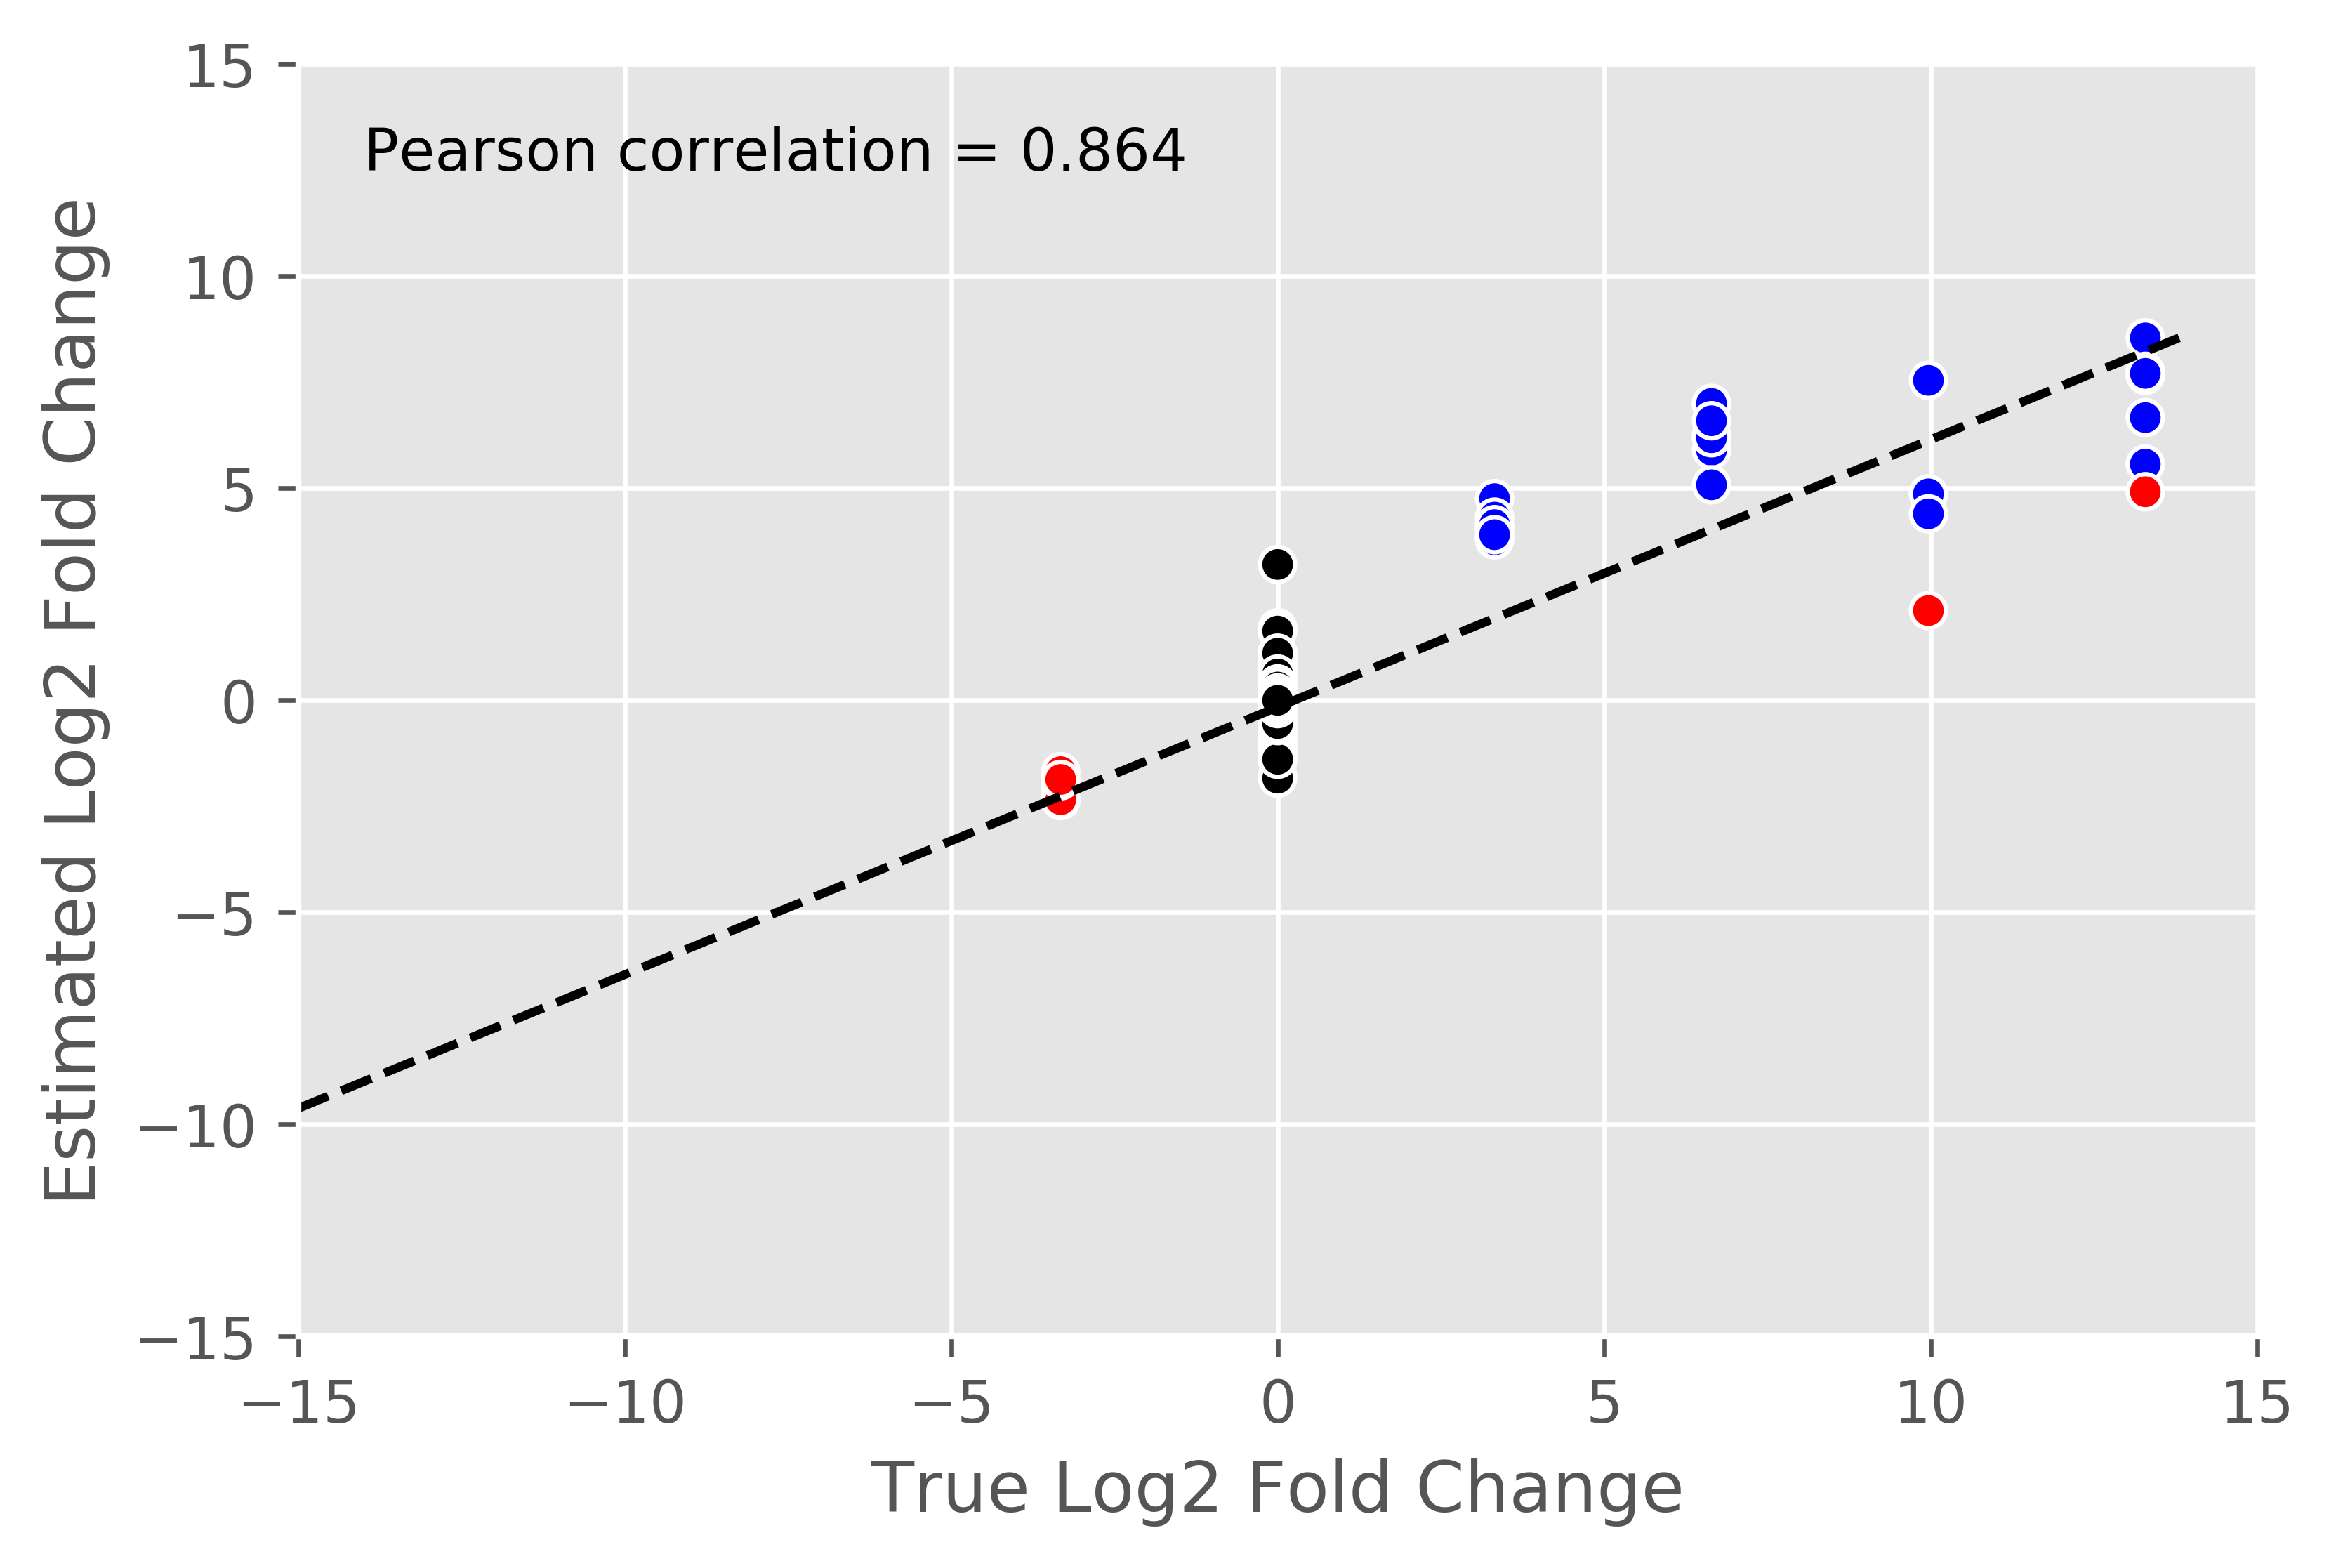

In [182]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

def return_true_log_fold_change(row):
    FC10000 = ["P00441","P01375","P02741", "P02788","P05413","P08758", "P10145", "P10636-8"]
    FC1000 = ["P06396", "O00762","P01112","P01579","P09211","P51965","P99999","P02787"]
    FC100 = ["O76070", "P01127", "P01344", "P08263", "P10599", "P55957","P61769", "P01008"]
    FC10 = ["P00709", "P02753", "P06732", "P12081", "P16083", "P61626", "P63279","Q15843"]
    FC01 = ["P68871", "P02768", "P00915", "P00918", "P01031", "P41159", "P62988", "P69905"]
    
    if re.search("|".join(FC10000), row["Protein"]):
        return np.log2(10000)
    elif re.search("|".join(FC1000), row["Protein"]):
        return np.log2(1000)
    elif re.search("|".join(FC100), row["Protein"]):
        return np.log2(100)
    elif re.search("|".join(FC10), row["Protein"]):
        return np.log2(10)
    elif re.search("|".join(FC01), row["Protein"]):
        return np.log2(0.1)
    else:
        return 0
    
def return_class(row):
    if abs(row["Log2FC"]) >1 and row["Adj P.value"] < 0.05:
        if re.search("|".join(difference_ups), row["Protein"]):
            return "TP"
        else:
            return "FP"
    else:
        if re.search("|".join(difference_ups), row["Protein"]):
            return "FN"
        else:
            return "TN"

MSstats_output_FALSE["True Log2 Fold Change"] = MSstats_output_FALSE.apply(lambda x: return_true_log_fold_change(x), axis=1)
MSstats_output_FALSE["class"] = MSstats_output_FALSE.apply(lambda x: return_class(x), axis=1)

c = MSstats_output_FALSE[["True Log2 Fold Change", "Log2FC"]].corr()
print(MSstats_output_FALSE_corr)
plt.style.use("ggplot")
model = LinearRegression().fit(np.reshape(MSstats_output_FALSE["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(MSstats_output_FALSE["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=MSstats_output_FALSE, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.864")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")



                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.875245
Log2FC                              0.875245  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

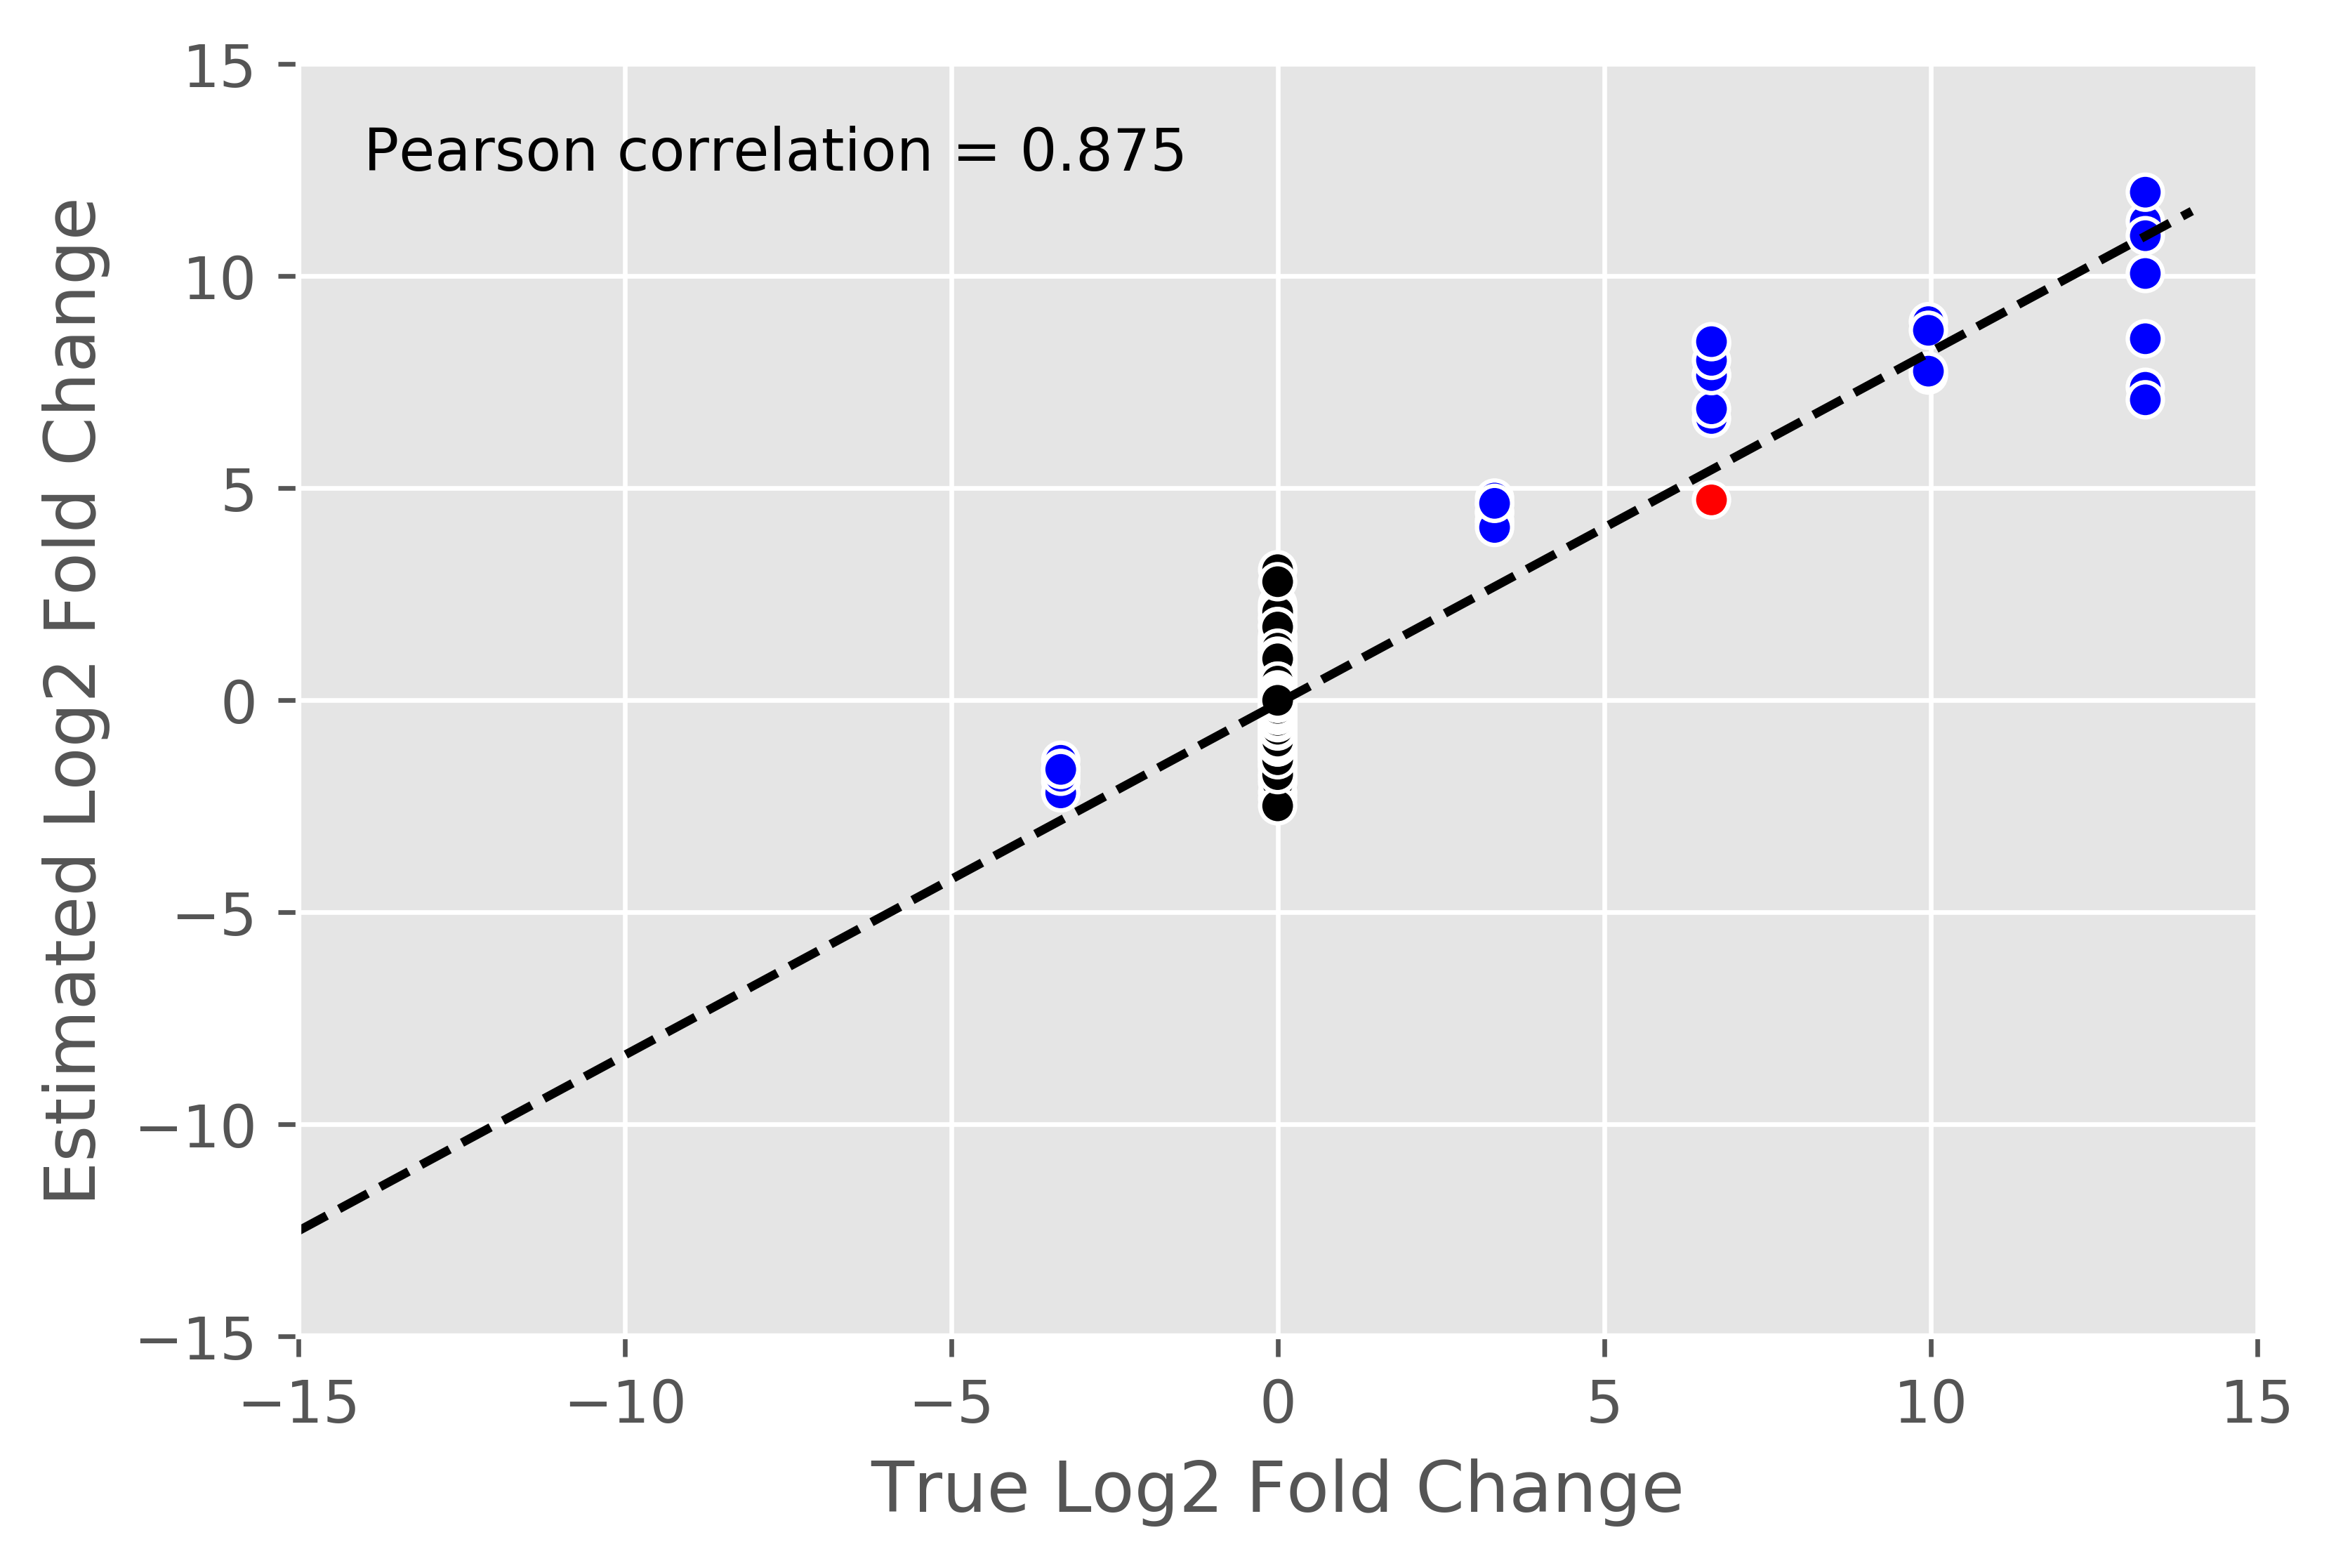

In [189]:
proteus_median["True Log2 Fold Change"] = proteus_median.apply(lambda x: return_true_log_fold_change(x), axis=1)
proteus_median["Log2FC"] = -proteus_median["Log2FC"]

proteus_median["class"] = proteus_median.apply(lambda x: return_class(x), axis=1)

c = proteus_median[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(proteus_median["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(proteus_median["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=proteus_median, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.875")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.884232
Log2FC                              0.884232  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

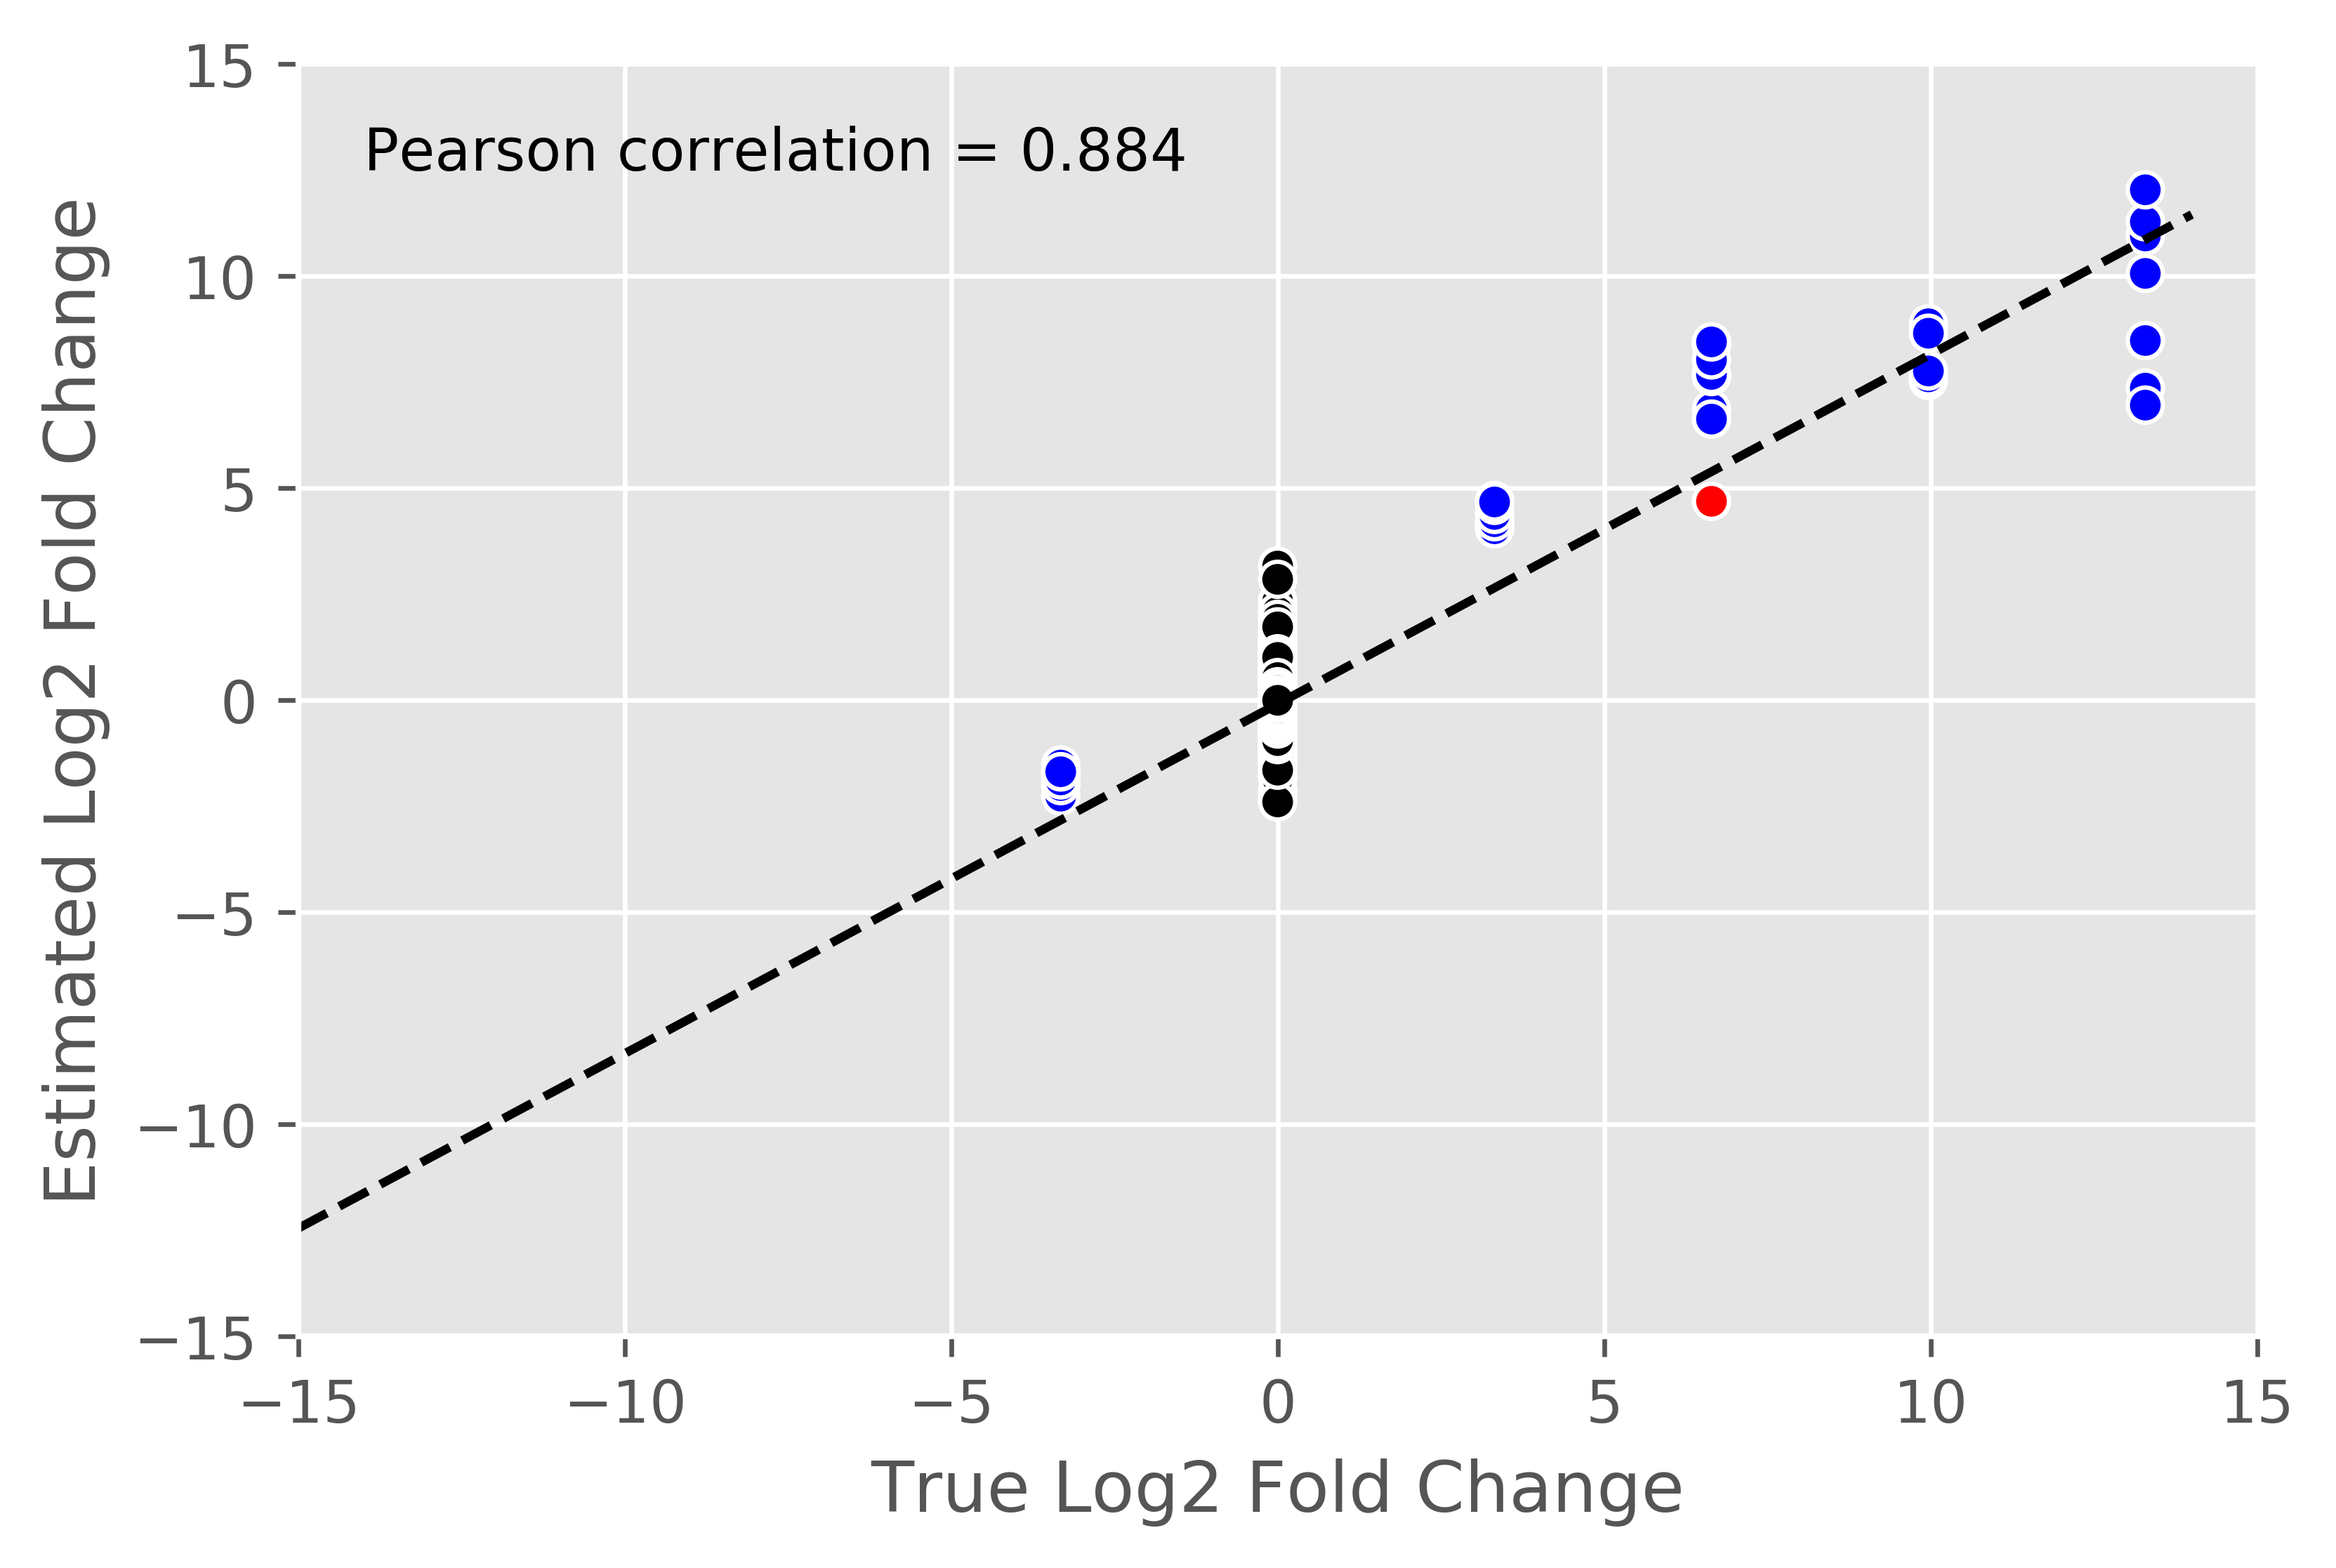

In [191]:
WaldTest_moderated["True Log2 Fold Change"] = WaldTest_moderated.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

WaldTest_moderated["class"] = WaldTest_moderated.apply(lambda x: return_class(x), axis=1)

c = WaldTest_moderated[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(WaldTest_moderated["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(WaldTest_moderated["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=WaldTest_moderated, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.884")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.910429
Log2FC                              0.910429  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

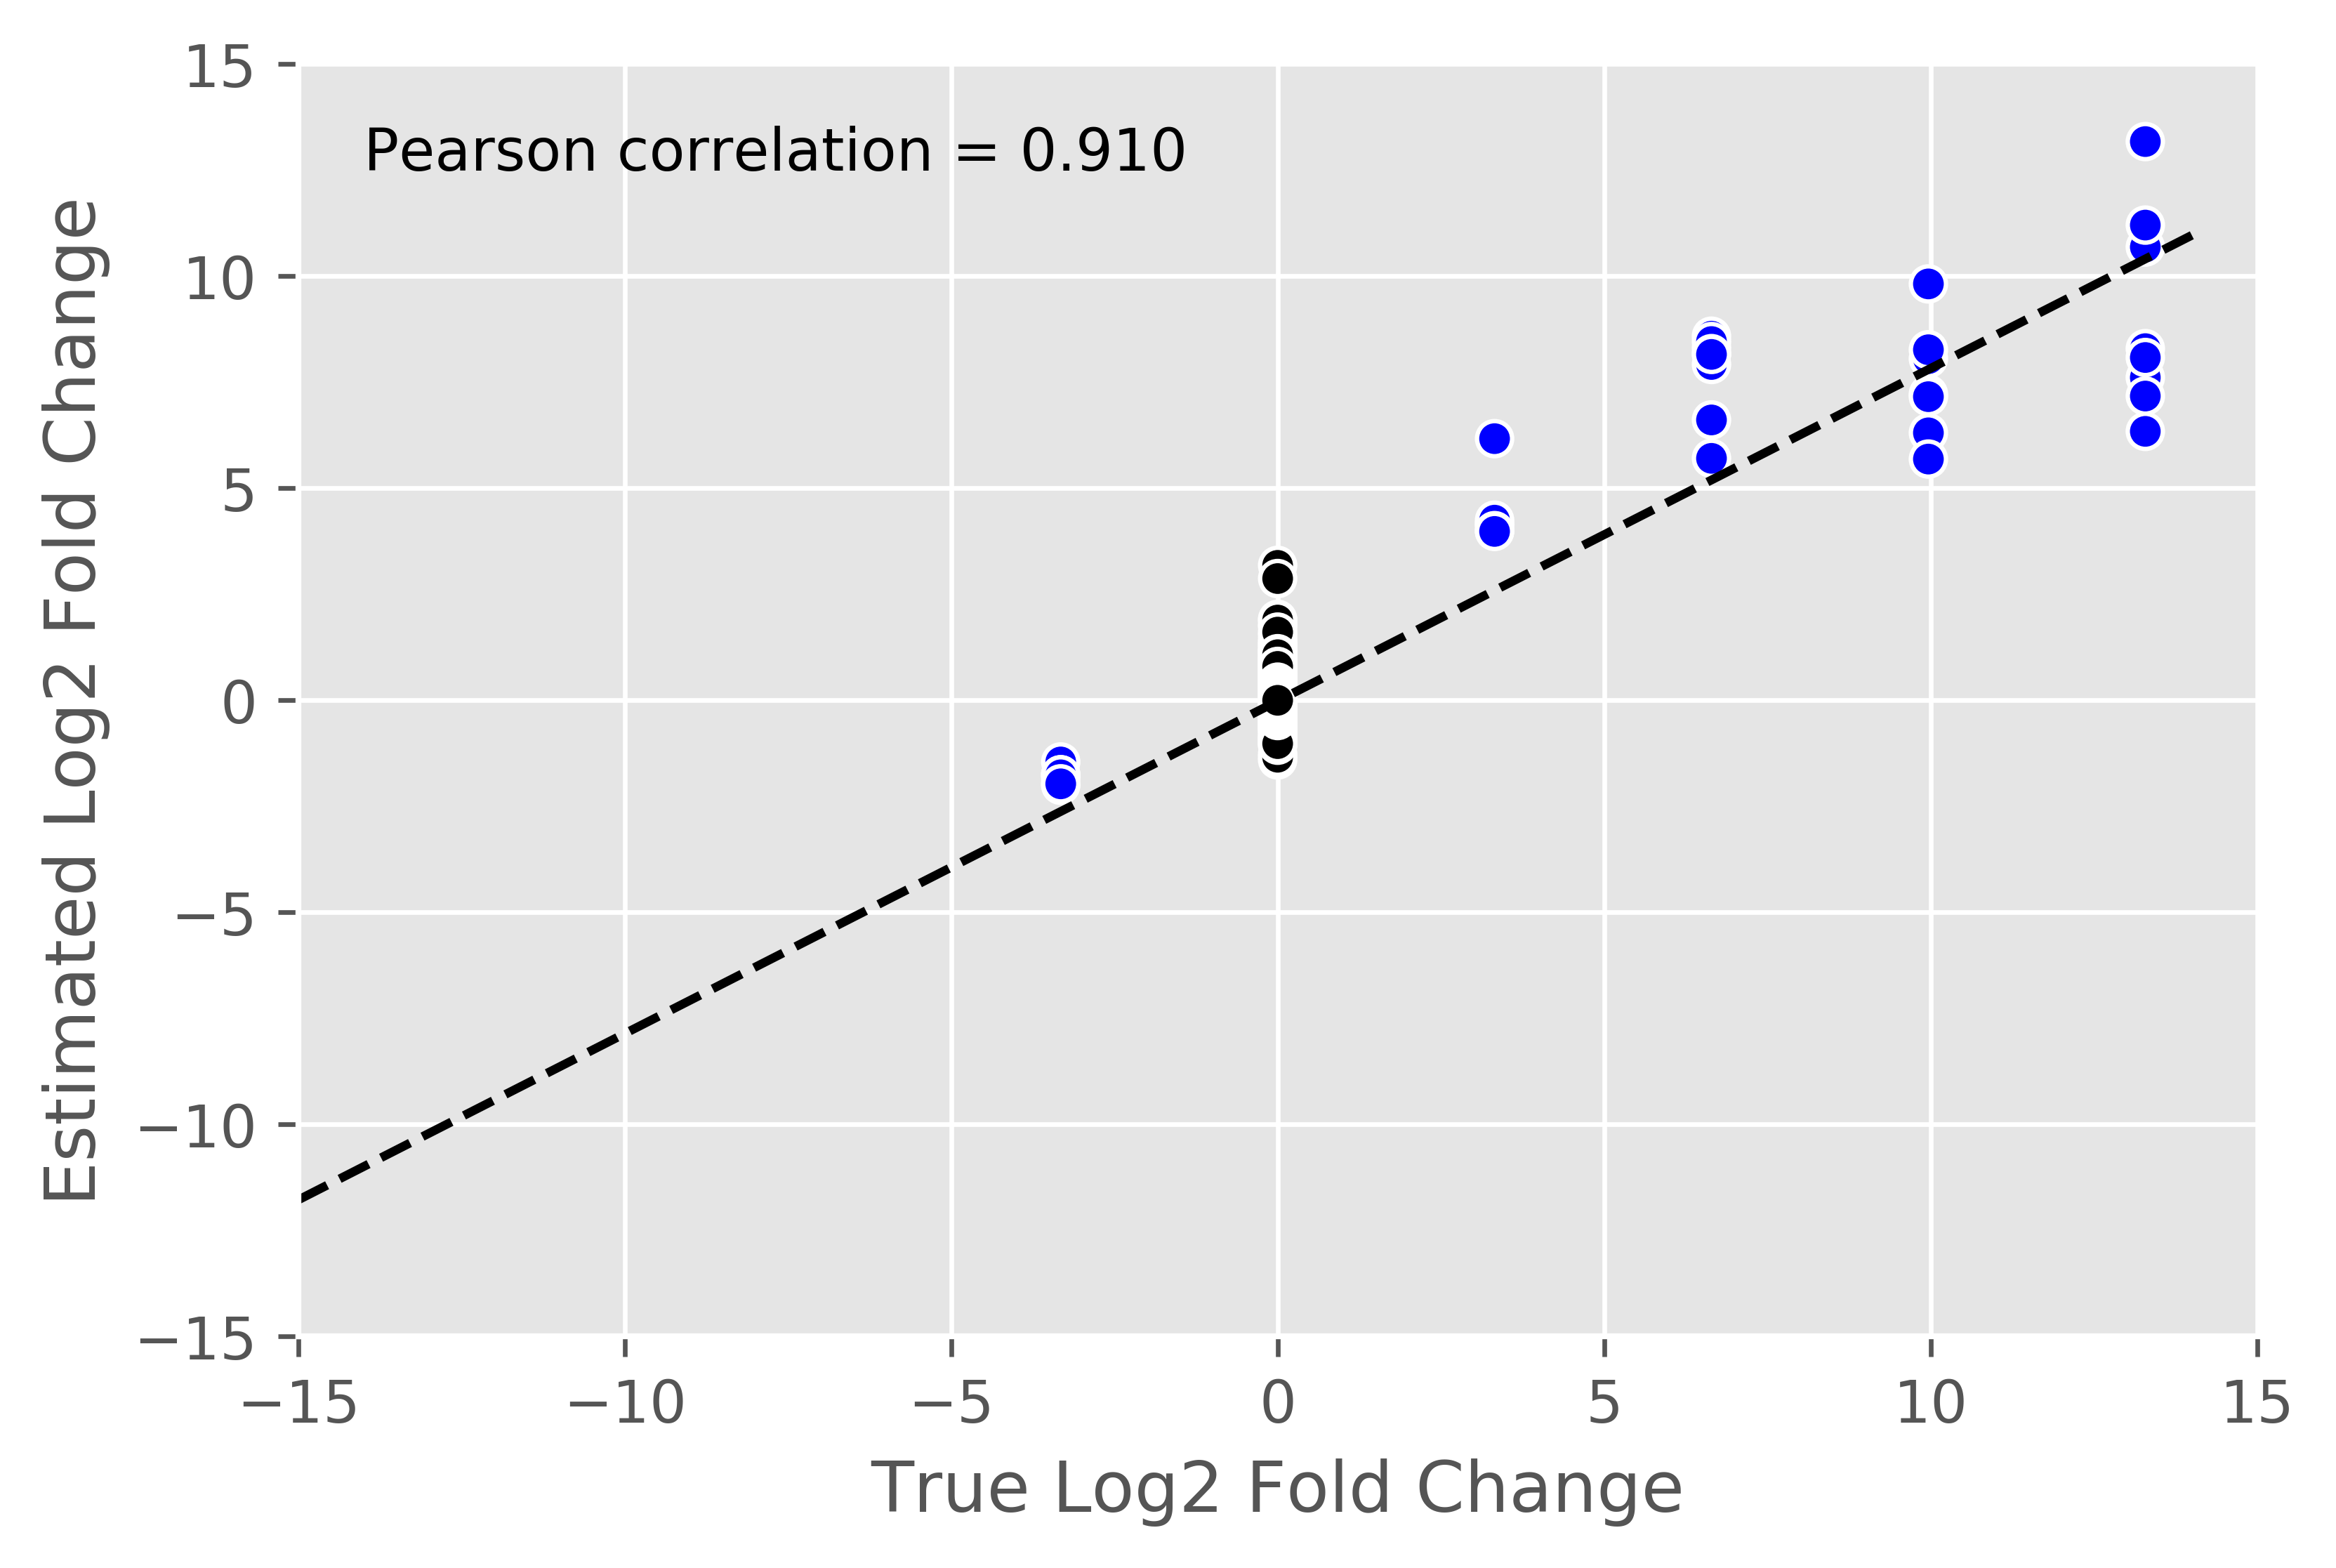

In [193]:
imputation_normal_distribution_no_normalization["True Log2 Fold Change"] = imputation_normal_distribution_no_normalization.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

imputation_normal_distribution_no_normalization["class"] = imputation_normal_distribution_no_normalization.apply(lambda x: return_class(x), axis=1)

c = imputation_normal_distribution_no_normalization[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(imputation_normal_distribution_no_normalization["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(imputation_normal_distribution_no_normalization["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=imputation_normal_distribution_no_normalization, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.910")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.912414
Log2FC                              0.912414  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

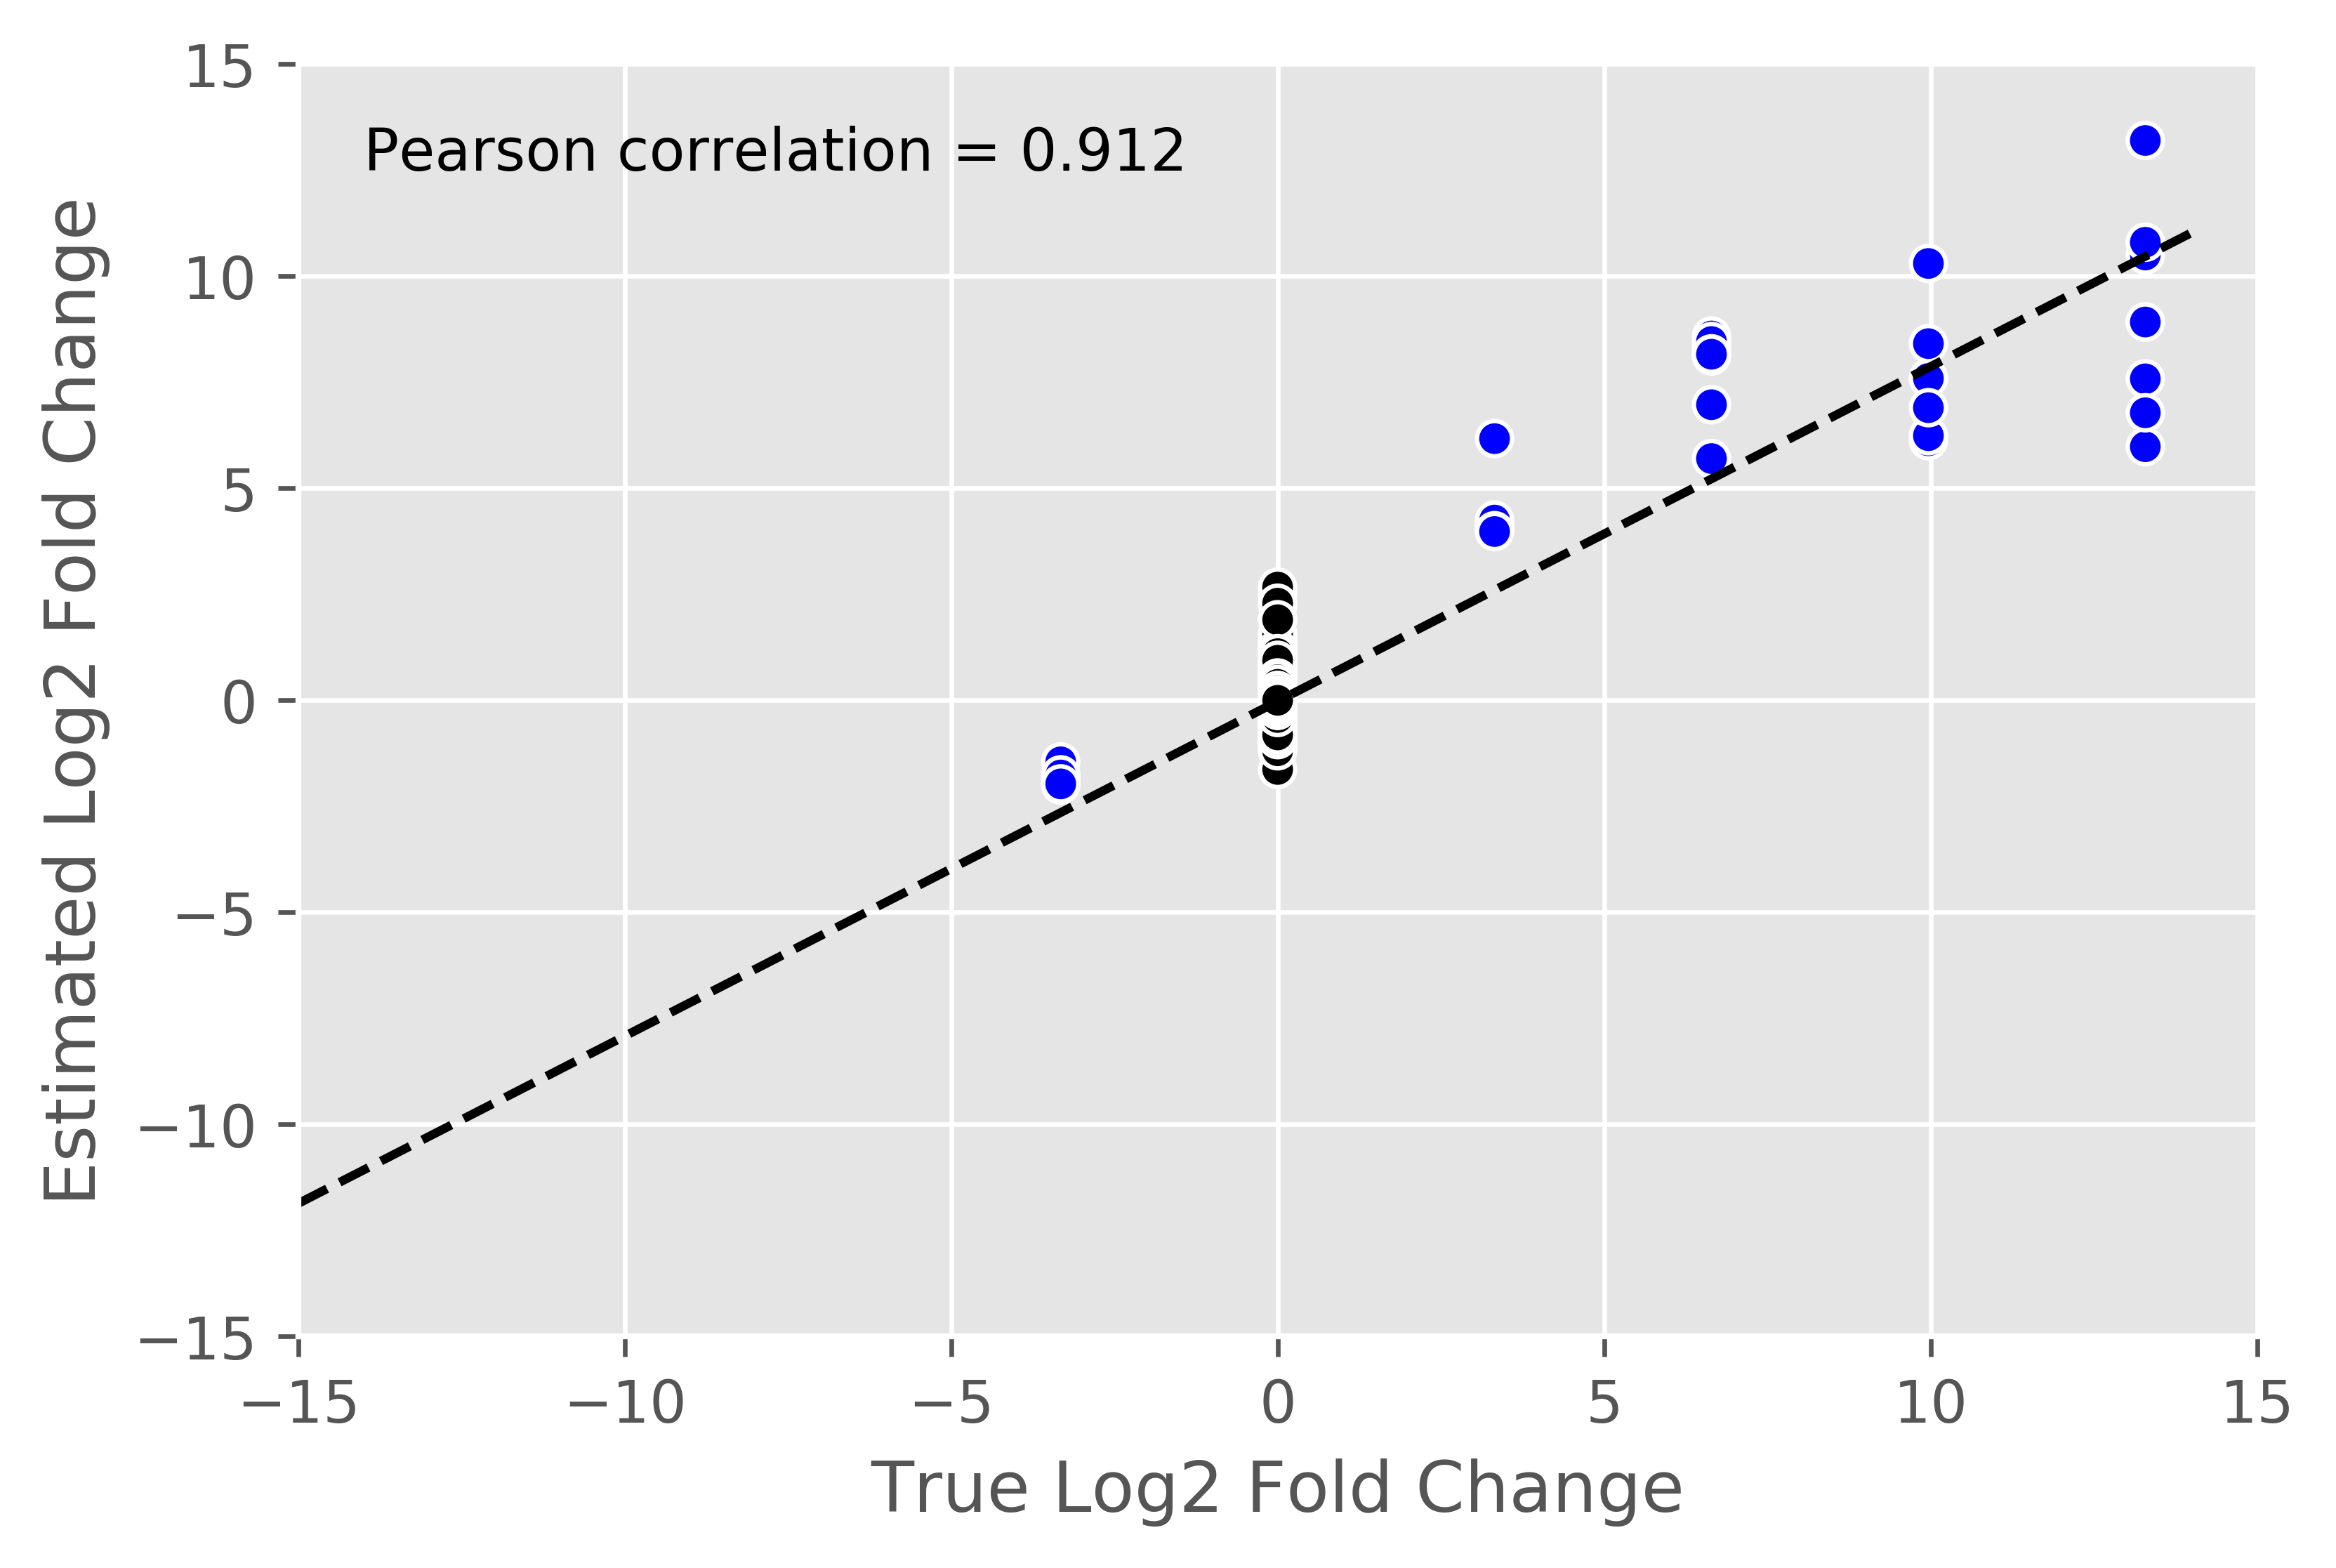

In [198]:
Results_imputationPerseustype["True Log2 Fold Change"] = Results_imputationPerseustype.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

Results_imputationPerseustype["class"] = Results_imputationPerseustype.apply(lambda x: return_class(x), axis=1)

c = Results_imputationPerseustype[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(Results_imputationPerseustype["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(Results_imputationPerseustype["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=Results_imputationPerseustype, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.912")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")


                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.926503
Log2FC                              0.926503  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

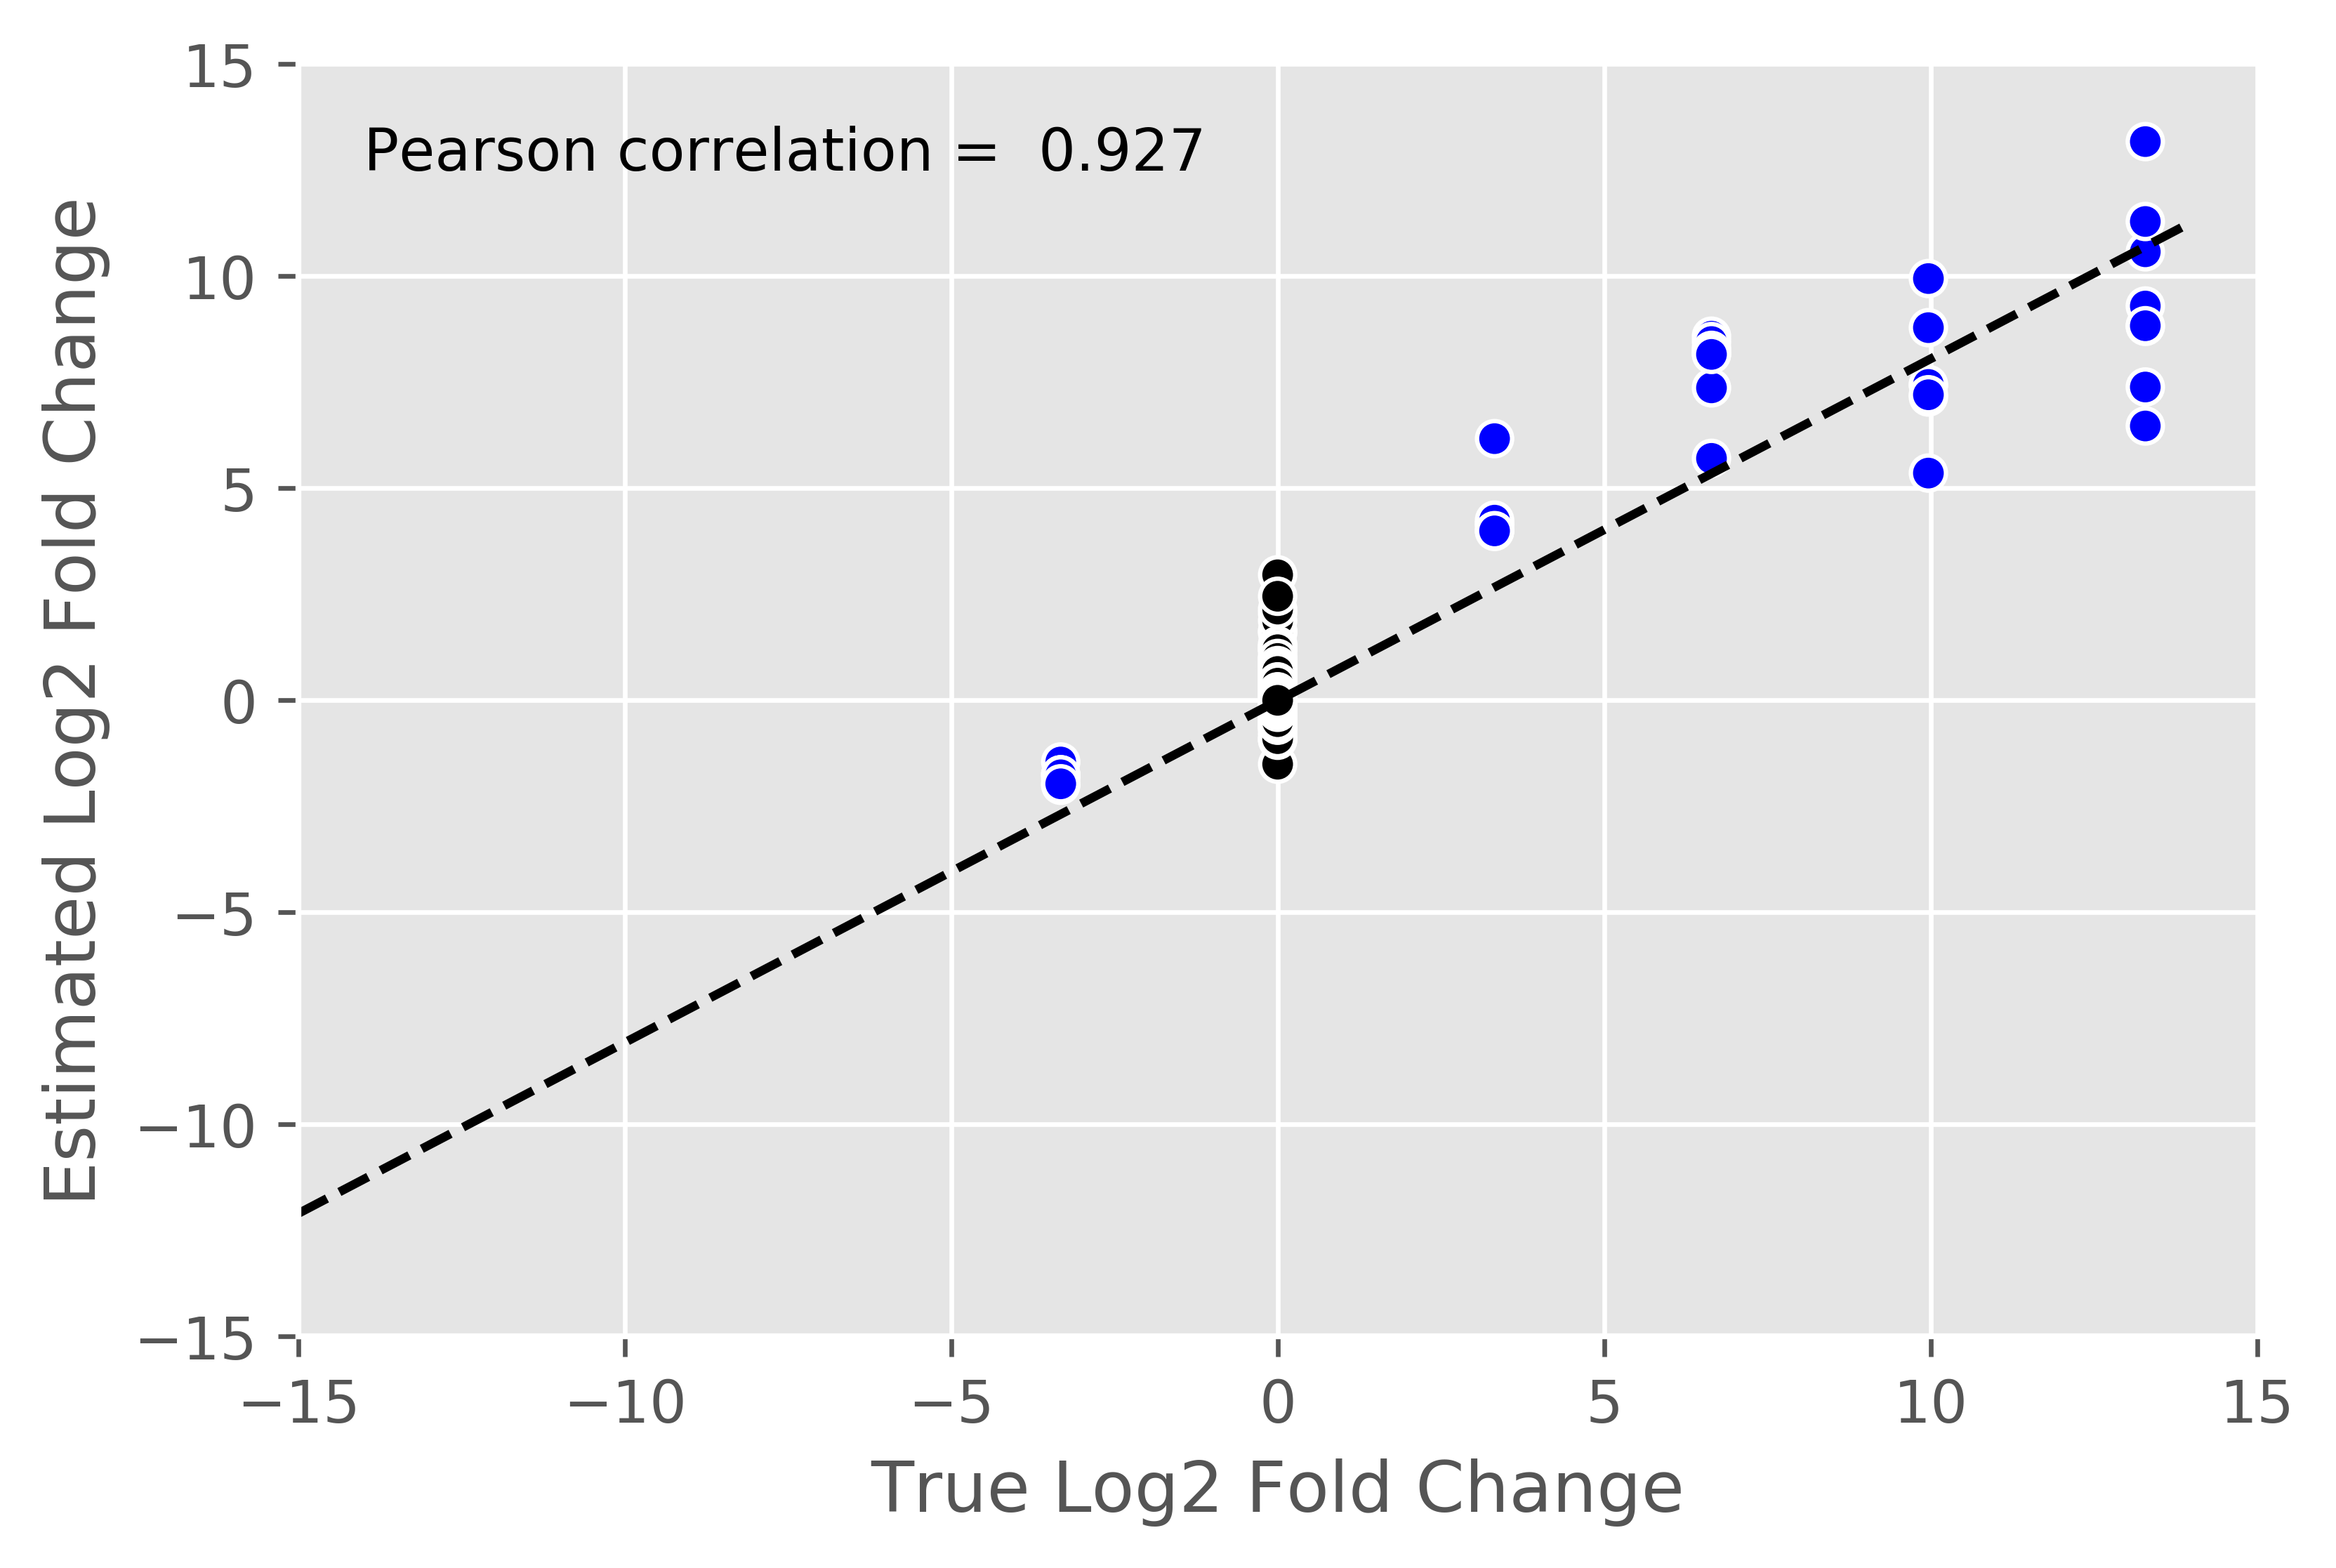

In [217]:
eatomics_imputation_perseus_like["True Log2 Fold Change"] = eatomics_imputation_perseus_like.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

eatomics_imputation_perseus_like["class"] = eatomics_imputation_perseus_like.apply(lambda x: return_class(x), axis=1)

c = eatomics_imputation_perseus_like[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(eatomics_imputation_perseus_like["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(eatomics_imputation_perseus_like["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=eatomics_imputation_perseus_like, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation =  0.927")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.908037
Log2FC                              0.908037  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

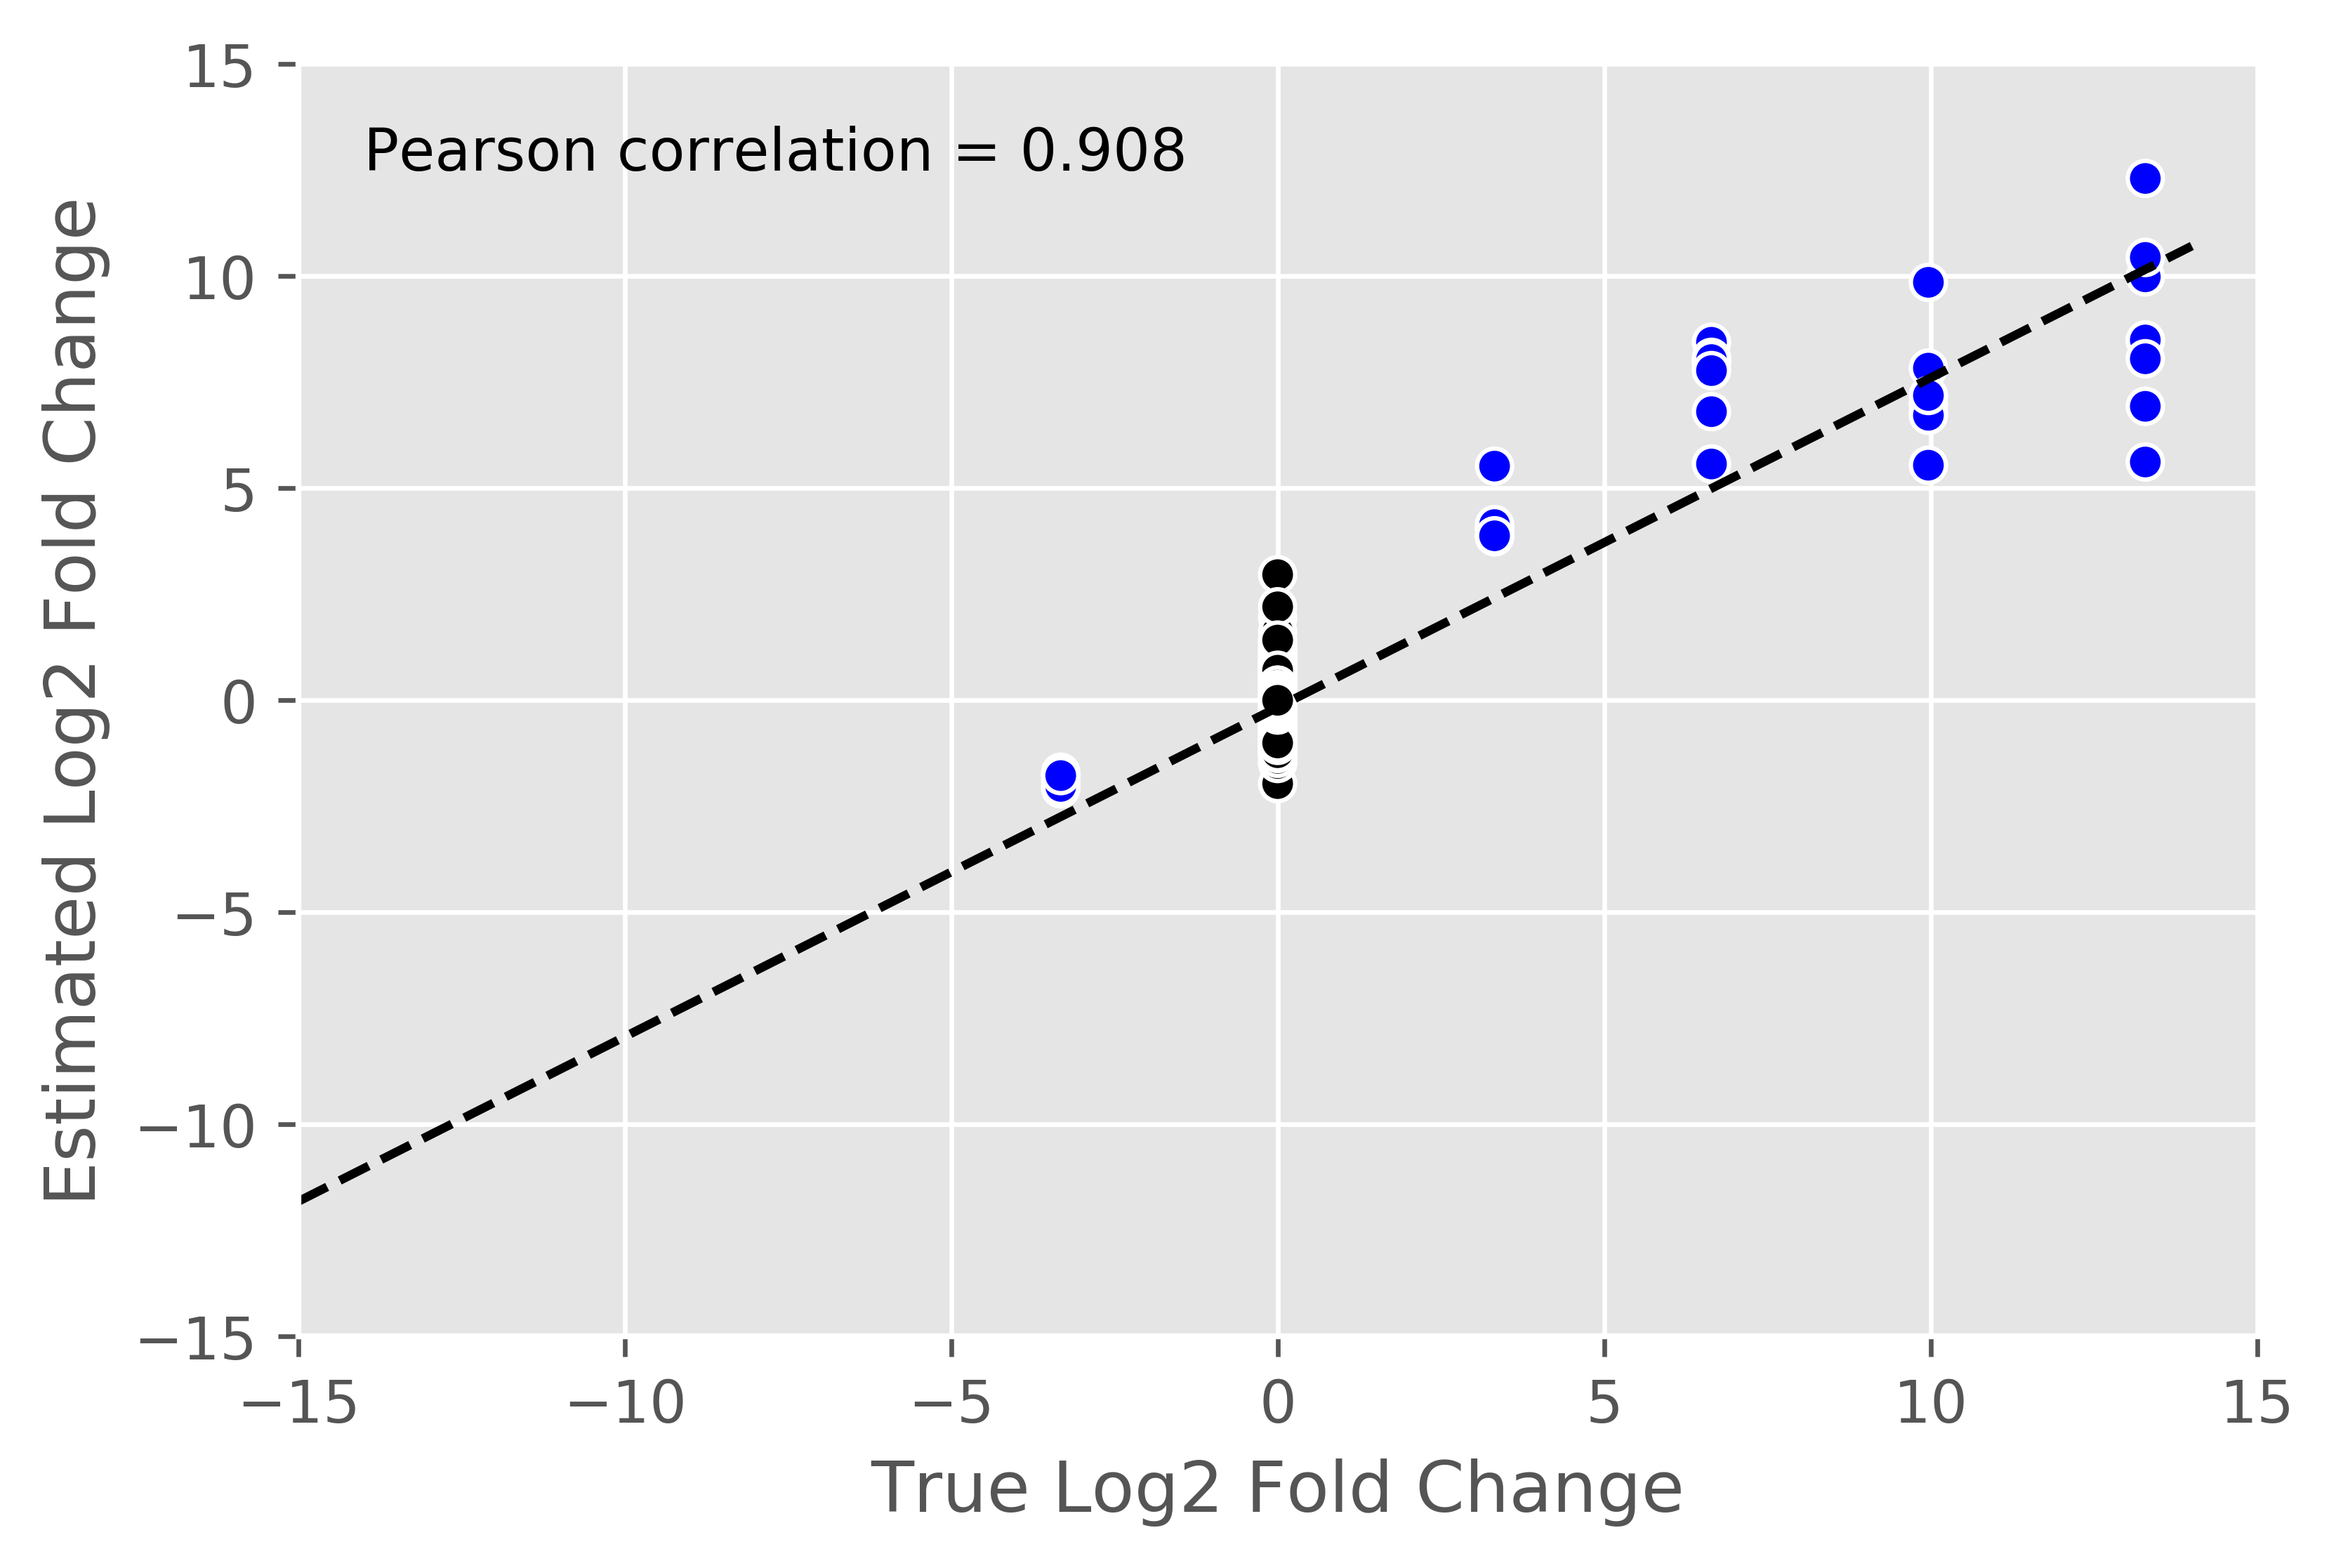

In [204]:
ProStaR_global_quantile_alignment_det_quantile["True Log2 Fold Change"] = ProStaR_global_quantile_alignment_det_quantile.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

ProStaR_global_quantile_alignment_det_quantile["class"] = ProStaR_global_quantile_alignment_det_quantile.apply(lambda x: return_class(x), axis=1)

c = ProStaR_global_quantile_alignment_det_quantile[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(ProStaR_global_quantile_alignment_det_quantile["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(ProStaR_global_quantile_alignment_det_quantile["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=ProStaR_global_quantile_alignment_det_quantile, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.908")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.933891
Log2FC                              0.933891  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

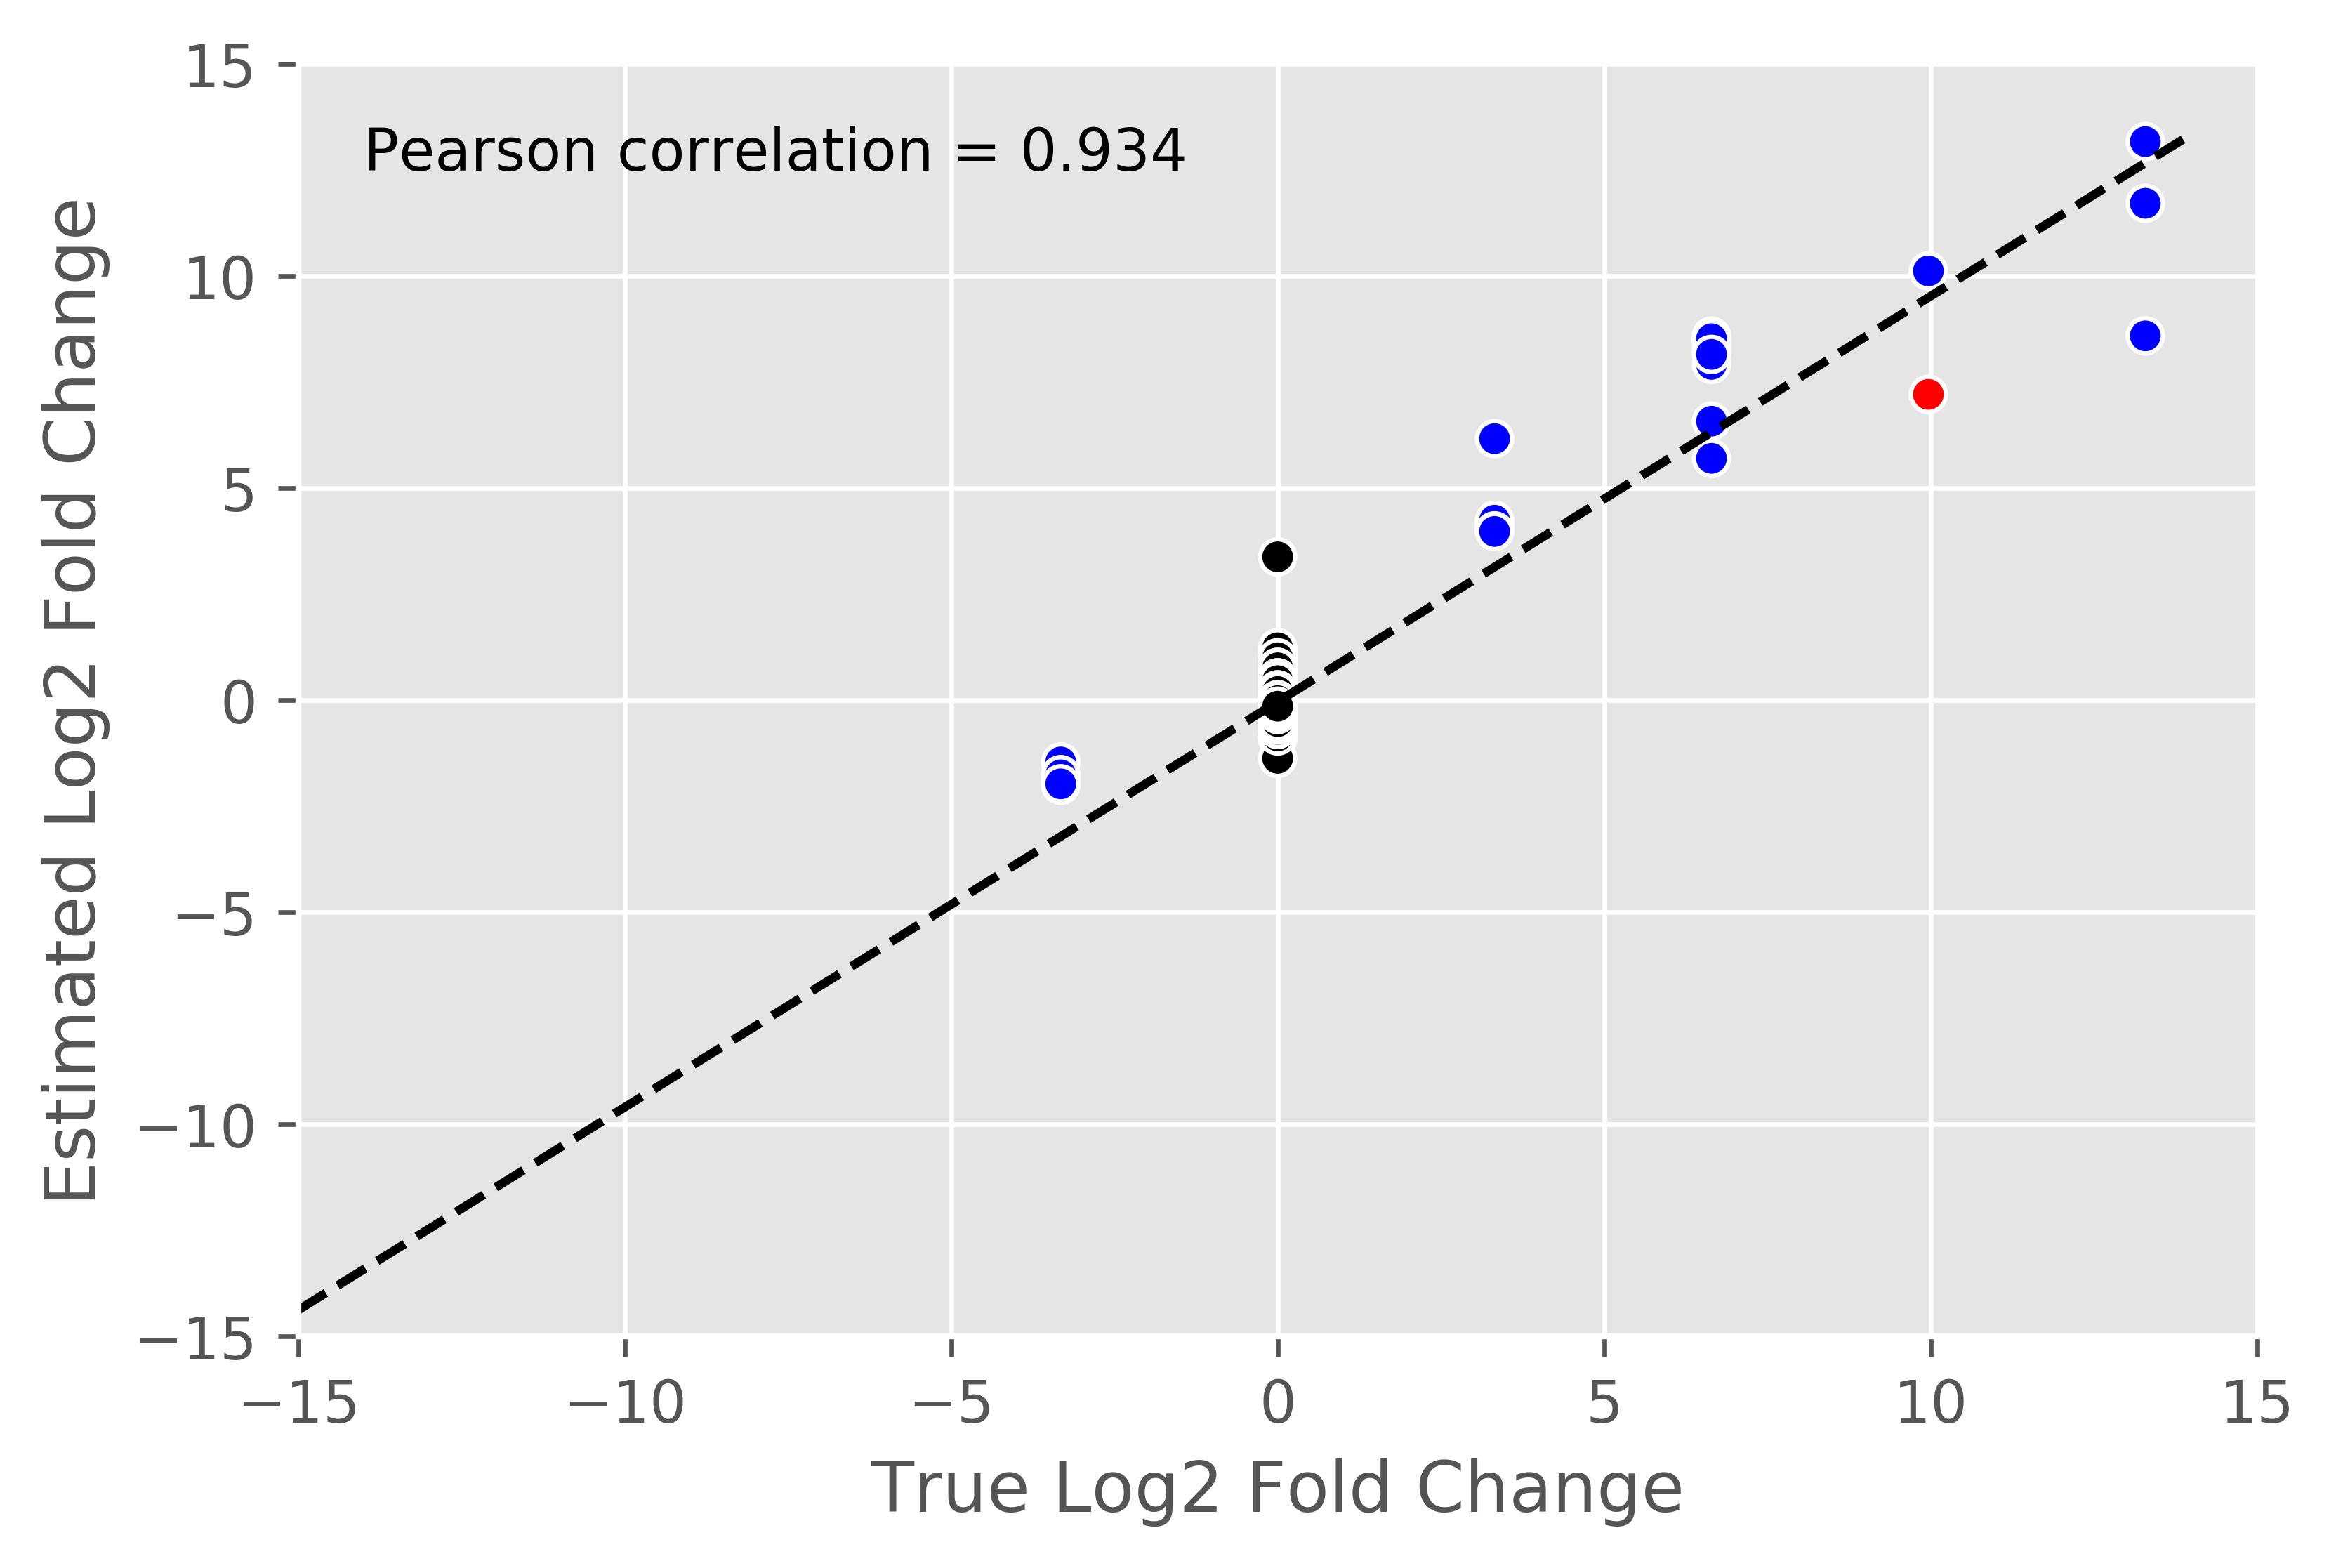

In [209]:
no_normalization_imputation_NaN["True Log2 Fold Change"] = no_normalization_imputation_NaN.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

no_normalization_imputation_NaN["class"] = no_normalization_imputation_NaN.apply(lambda x: return_class(x), axis=1)

c = no_normalization_imputation_NaN[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(no_normalization_imputation_NaN["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(no_normalization_imputation_NaN["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=no_normalization_imputation_NaN, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation = 0.934")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

                       True Log2 Fold Change    Log2FC
True Log2 Fold Change               1.000000  0.936793
Log2FC                              0.936793  1.000000


Text(0, 0.5, 'Estimated Log2 Fold Change')

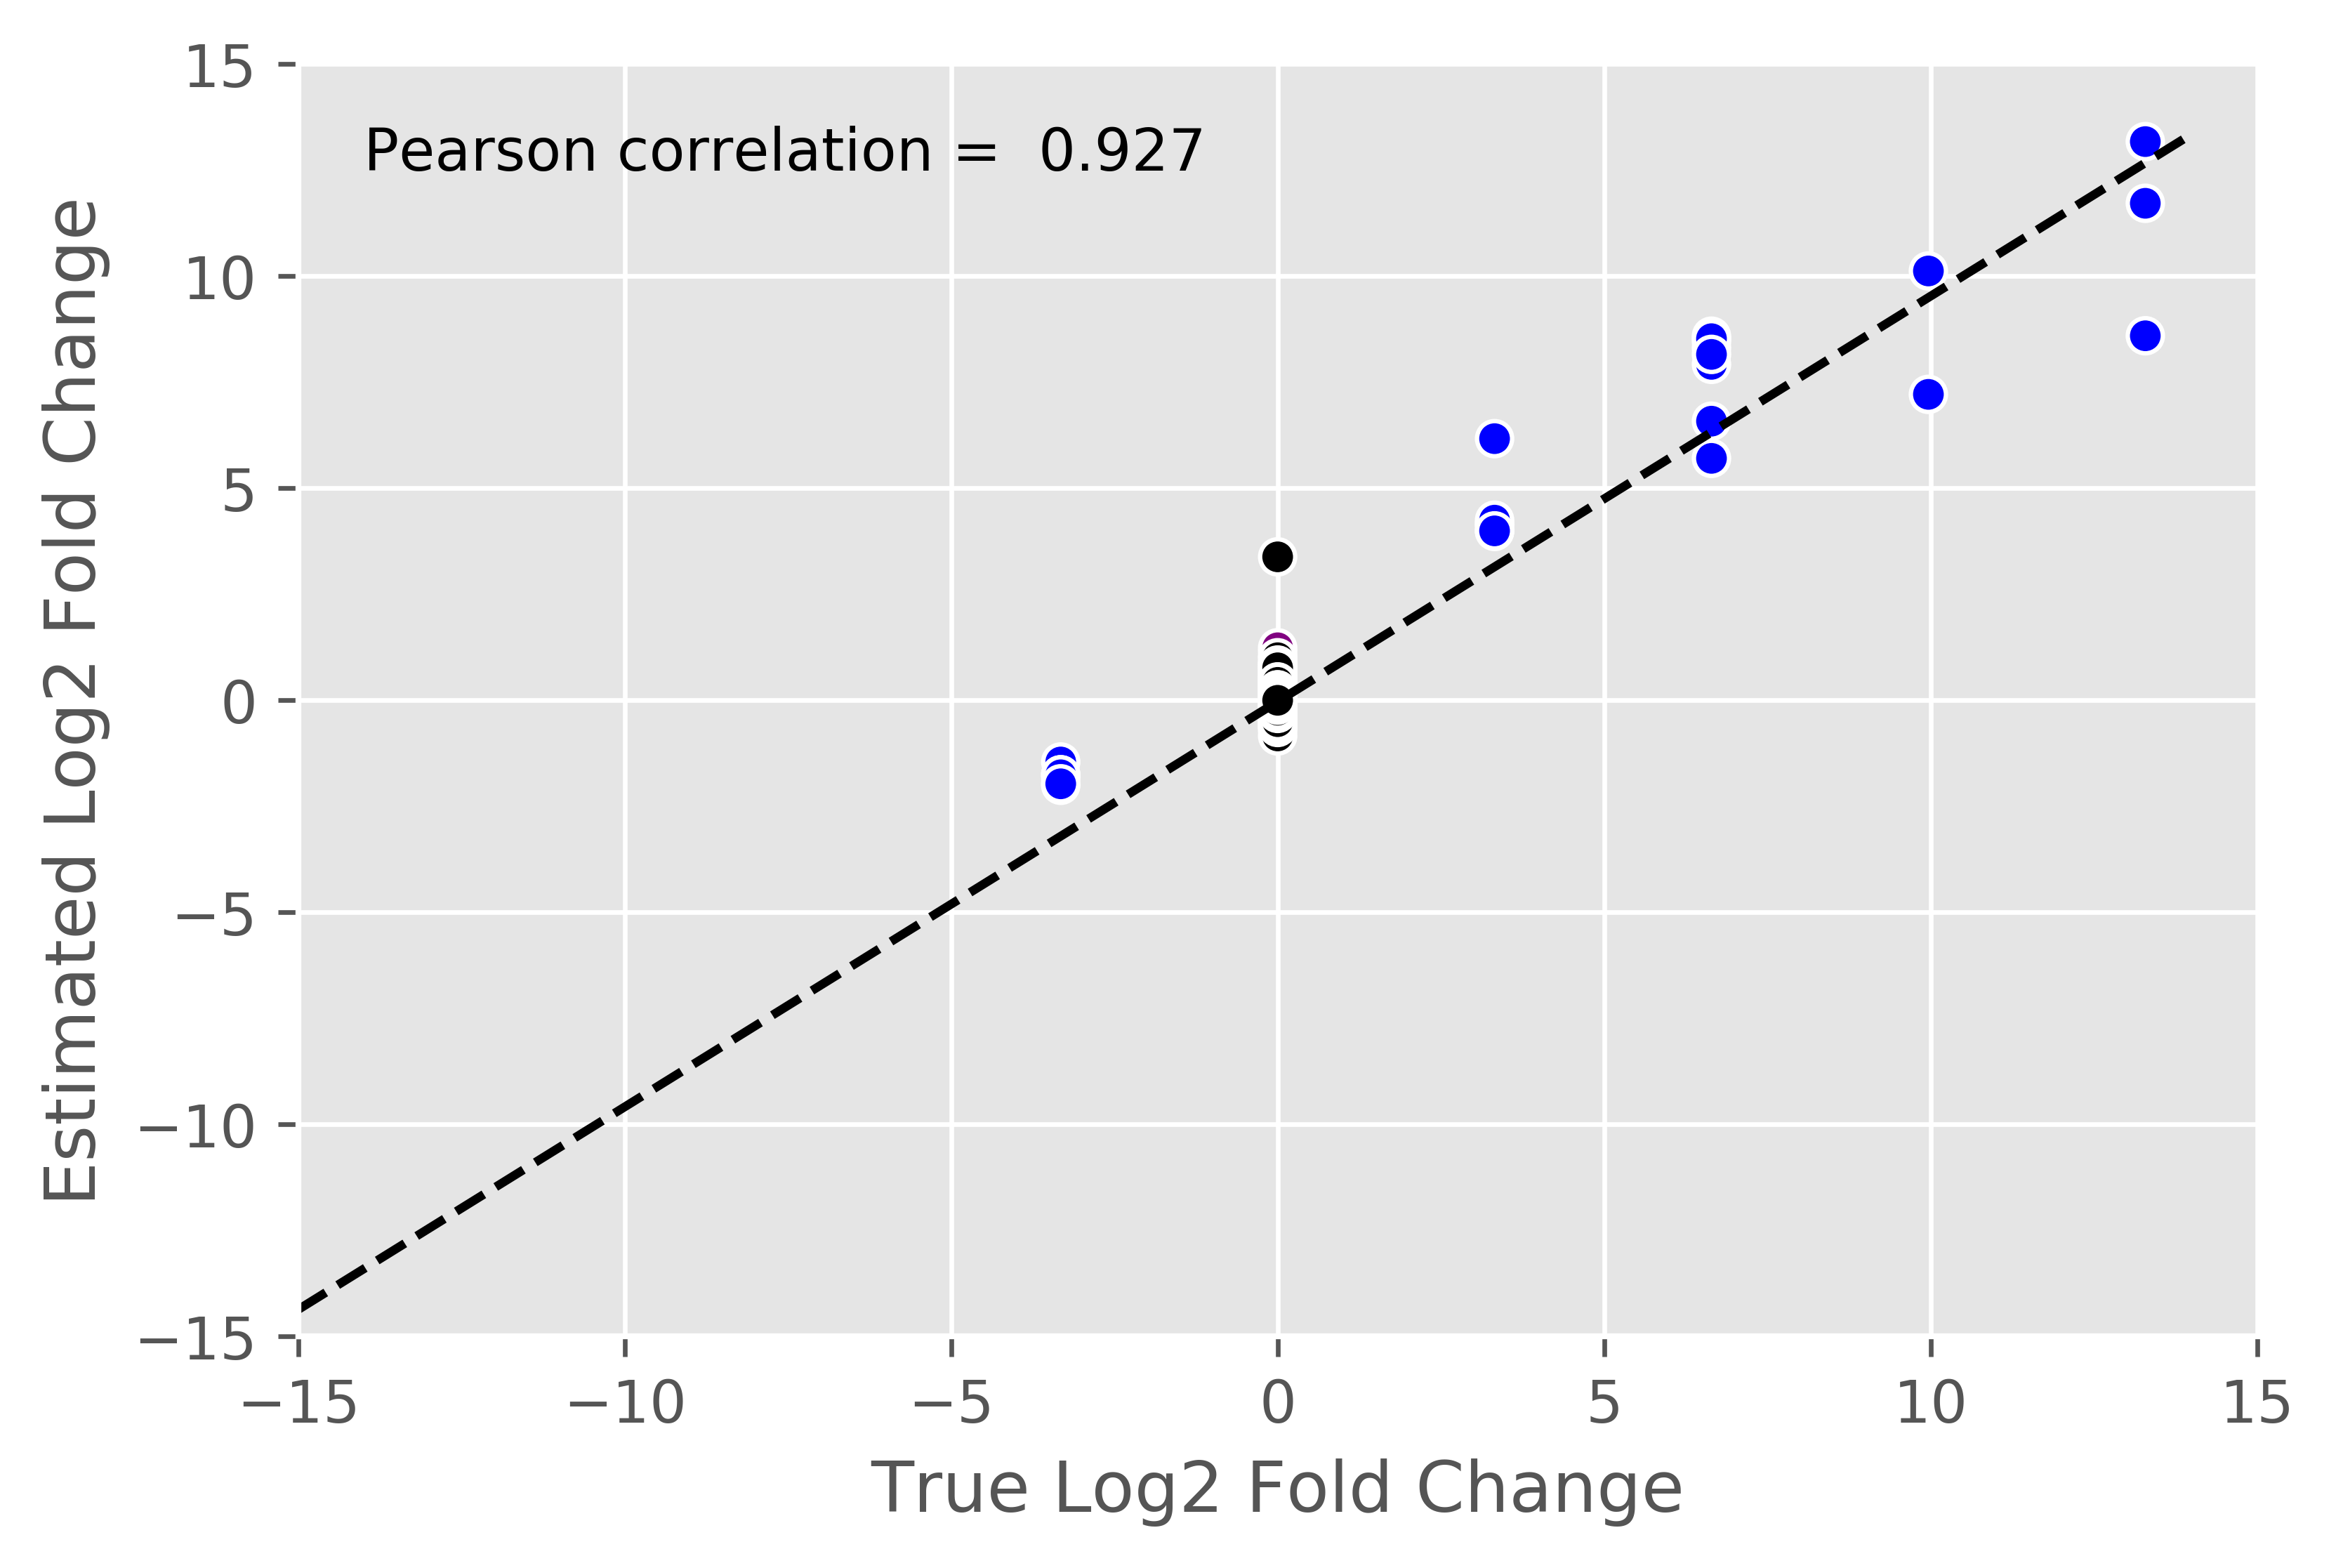

In [220]:
eatomics_imputation_perseus_like = pd.read_excel("./eatomics/EatomicsDataconditionconditionUPS1vs.conditionUPS22022-06-02.csv", header=0, sheet_name="Downregulated.Proteins")
Upregulated_Proteins = pd.read_excel("./eatomics/EatomicsDataconditionconditionUPS1vs.conditionUPS22022-06-02.csv", header=0, sheet_name="Upregulated.Proteins")
eatomics_imputation_perseus_like = eatomics_imputation_perseus_like.append(Upregulated_Proteins, ignore_index=True)
eatomics_imputation_perseus_like.dropna(subset=["adj.P.Val", "logFC"], how="any", inplace=True)
eatomics_imputation_perseus_like['value'] = 1 - eatomics_imputation_perseus_like["adj.P.Val"]
eatomics_imputation_perseus_like['y'] = eatomics_imputation_perseus_like.apply(lambda x: distinguish_truth(x), axis=1)
eatomics_imputation_perseus_like = eatomics_imputation_perseus_like.sort_values(by="value", ascending=False)
eatomics_imputation_perseus_like.head()
eatomics_imputation_perseus_like.rename(columns={"Majority protein IDs": "Protein", "logFC": "Log2FC", "adj.P.Val": "Adj P.value"}, inplace=True)
fpr, tpr, thresholds = metrics.roc_curve(eatomics_imputation_perseus_like['y'].tolist(), eatomics_imputation_perseus_like['value'].tolist(), pos_label = 1)
auc = metrics.auc(fpr, tpr)
auc_data = auc_data.append({"fpr": fpr, "tpr": tpr, "auc": auc, "combination": "Eatomics (ND - NN)"}, ignore_index=True)
eatomics_imputation_perseus_like["True Log2 Fold Change"] = eatomics_imputation_perseus_like.apply(lambda x: return_true_log_fold_change(x), axis=1)
# WaldTest_moderated["Log2FC"] = -WaldTest_moderated["Log2FC"]

eatomics_imputation_perseus_like["class"] = eatomics_imputation_perseus_like.apply(lambda x: return_class(x), axis=1)

c = eatomics_imputation_perseus_like[["True Log2 Fold Change", "Log2FC"]].corr()
print(c)

model = LinearRegression().fit(np.reshape(eatomics_imputation_perseus_like["True Log2 Fold Change"].tolist(),(-1,1)), np.reshape(eatomics_imputation_perseus_like["Log2FC"].tolist(),(-1,1)))
fig, ax = plt.subplots()
plt.rcParams['figure.dpi'] = 600
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(np.reshape(list(range(-15,15,1)), (-1,1)), model.predict(np.reshape(list(range(-15,15,1)),(-1,1))), c="black", linestyle="--")


sns.scatterplot(x="True Log2 Fold Change", y="Log2FC", data=eatomics_imputation_perseus_like, hue="class",palette=["Blue", "Red", "Black", "Purple"], hue_order=["TP", "FN", "TN", "FP"])
ax.text(-14, 12.5, "Pearson correlation =  0.927")
ax.get_legend().remove()
plt.ylabel("Estimated Log2 Fold Change")

In [262]:
%%R -w 800 -h 800
library(dplyr)
library(tidyverse)
library(openxlsx)
library(psych)

MSstats_output_FALSE = './MSstats/MSstats_output_FALSE.csv'
MSstats_output_FALSE = read.csv(MSstats_output_FALSE, header = TRUE, sep = ',')
MSstats_output_FALSE = MSstats_output_FALSE %>% filter(adj.pvalue>0)
MSstats_output_FALSE <- select(MSstats_output_FALSE, c("Protein", "adj.pvalue"))
MSstats_output_FALSE <- MSstats_output_FALSE[!grepl("CON|REV", MSstats_output_FALSE$Protein),]


proteus_median = './proteus/proteus_median.csv'
proteus_median = read.csv(proteus_median, header = TRUE, sep = ',')
proteus_median <- select(proteus_median, c("protein", "adj.P.Val"))
colnames(proteus_median) <- c("Protein", "adj.pvalue")
proteus_median <- na.omit(proteus_median)
proteus_median <- proteus_median[!grepl("CON|REV", proteus_median$Protein),]


prolfqua_WaldTest_moderated = './prolfqua/prolfqua-WaldTest_moderated.csv'
prolfqua_WaldTest_moderated = read.csv(prolfqua_WaldTest_moderated, header = TRUE, sep = ',')
prolfqua_WaldTest_moderated <- select(prolfqua_WaldTest_moderated, c("protein_Id", "FDR"))
colnames(prolfqua_WaldTest_moderated) <- c("Protein", "adj.pvalue")
prolfqua_WaldTest_moderated <- prolfqua_WaldTest_moderated[!grepl("CON|REV", prolfqua_WaldTest_moderated$Protein),]



provision = './provision/imputation_normal_distribution_no_normalization.csv'
provision = read.csv(provision, header = TRUE, sep = '\t')
provision <- select(provision, c("protein", "qValue"))
colnames(provision) <- c("Protein", "adj.pvalue")

  

lfq_analyst = './lfq/Results_imputationPerseustype.csv'
lfq_analyst = read.csv(lfq_analyst, header = TRUE, sep = ',')
lfq_analyst <- select(lfq_analyst, c("Protein.IDs", "UPS1_vs_UPS2_p.adj"))
colnames(lfq_analyst) <- c("Protein", "adj.pvalue")


eatomics_imputation_perseus_like = './eatomics/eatomics_imputation_perseus_like.xlsx'
eatomics_imputation_perseus_like_up <- read.xlsx(eatomics_imputation_perseus_like, sheet = "Upregulated.Proteins")
eatomics_imputation_perseus_like_down <- read.xlsx(eatomics_imputation_perseus_like, sheet = "Downregulated.Proteins")
eatomics_imputation_perseus_like <- rbind(eatomics_imputation_perseus_like_up, eatomics_imputation_perseus_like_down)
eatomics_imputation_perseus_like <- select(eatomics_imputation_perseus_like, c("Protein.IDs", "adj.P.Val"))
colnames(eatomics_imputation_perseus_like) <- c("Protein", "adj.pvalue")
eatomics_imputation_perseus_like <- eatomics_imputation_perseus_like[!grepl("CON|REV", eatomics_imputation_perseus_like$Protein),]


ProStaR = './ProStaR/ProStaR_normalization_global_quantile_alignment_inputation_det_quantile.xlsx'
ProStaR <- read.xlsx(ProStaR, sheet = "DA result")
ProStaR <- select(ProStaR, c("Protein_IDs", "P_Value.(UPS1_vs_UPS2)"))
colnames(ProStaR) <- c("Protein", "adj.pvalue")
ProStaR <- ProStaR[!grepl("CON|REV", ProStaR$Protein),]



perseus = './perseus/no_normalization_imputation_NaN.txt'
perseus = read.csv(perseus, header = TRUE, sep = '\t')
perseus <- select(perseus, c("Protein.IDs", "Student.s.T.test.q.value.1_2"))
colnames(perseus) <- c("Protein", "adj.pvalue")
perseus <- perseus[!grepl("CON|REV", perseus$Protein),]


pair_T = data.frame()

pair_T = full_join(MSstats_output_FALSE, proteus_median, by="Protein")
pair_T = full_join(pair_T, prolfqua_WaldTest_moderated, by="Protein")
pair_T = full_join(pair_T, provision, by="Protein")
pair_T = full_join(pair_T, lfq_analyst, by="Protein")
pair_T = full_join(pair_T, eatomics_imputation_perseus_like, by="Protein")
pair_T = full_join(pair_T, ProStaR, by="Protein")
pair_T = full_join(pair_T, perseus, by="Protein")


colnames(pair_T) <- c('Protein','MSstats', 'Proteus', 'prolfqua',"Provision" , 'LFQ-Analyst','Eatomics', 'ProstaR', 'Perseus')
pairs.panels(pair_T[,2:9], lm = TRUE, digits=4)


'utf-8' codec can't decode byte 0xb2 in position 29: invalid start byte


From cffi callback <function _consolewrite_ex at 0x0000020967AE5CA8>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 29: invalid start byte


RInterpreterError: Failed to parse and evaluate line 'library(dplyr)\nlibrary(tidyverse)\nlibrary(openxlsx)\n# library(psych)\n\n# MSstats_output_FALSE = \'./MSstats/MSstats_output_FALSE.csv\'\n# MSstats_output_FALSE = read.csv(MSstats_output_FALSE, header = TRUE, sep = \',\')\n# MSstats_output_FALSE = MSstats_output_FALSE %>% filter(adj.pvalue>0)\n# MSstats_output_FALSE <- select(MSstats_output_FALSE, c("Protein", "adj.pvalue"))\n# MSstats_output_FALSE <- MSstats_output_FALSE[!grepl("CON|REV", MSstats_output_FALSE$Protein),]\n\n\n# proteus_median = \'./proteus/proteus_median.csv\'\n# proteus_median = read.csv(proteus_median, header = TRUE, sep = \',\')\n# proteus_median <- select(proteus_median, c("protein", "adj.P.Val"))\n# colnames(proteus_median) <- c("Protein", "adj.pvalue")\n# proteus_median <- na.omit(proteus_median)\n# proteus_median <- proteus_median[!grepl("CON|REV", proteus_median$Protein),]\n\n\n# prolfqua_WaldTest_moderated = \'./prolfqua/prolfqua-WaldTest_moderated.csv\'\n# prolfqua_WaldTest_moderated = read.csv(prolfqua_WaldTest_moderated, header = TRUE, sep = \',\')\n# prolfqua_WaldTest_moderated <- select(prolfqua_WaldTest_moderated, c("protein_Id", "FDR"))\n# colnames(prolfqua_WaldTest_moderated) <- c("Protein", "adj.pvalue")\n# prolfqua_WaldTest_moderated <- prolfqua_WaldTest_moderated[!grepl("CON|REV", prolfqua_WaldTest_moderated$Protein),]\n\n\n\n# provision = \'./provision/imputation_normal_distribution_no_normalization.csv\'\n# provision = read.csv(provision, header = TRUE, sep = \'\\t\')\n# provision <- select(provision, c("protein", "qValue"))\n# colnames(provision) <- c("Protein", "adj.pvalue")\n\n  \n\n# lfq_analyst = \'./lfq/Results_imputationPerseustype.csv\'\n# lfq_analyst = read.csv(lfq_analyst, header = TRUE, sep = \',\')\n# lfq_analyst <- select(lfq_analyst, c("Protein.IDs", "UPS1_vs_UPS2_p.adj"))\n# colnames(lfq_analyst) <- c("Protein", "adj.pvalue")\n\n\n# eatomics_imputation_perseus_like = \'./eatomics/eatomics_imputation_perseus_like.xlsx\'\n# eatomics_imputation_perseus_like_up <- read.xlsx(eatomics_imputation_perseus_like, sheet = "Upregulated.Proteins")\n# eatomics_imputation_perseus_like_down <- read.xlsx(eatomics_imputation_perseus_like, sheet = "Downregulated.Proteins")\n# eatomics_imputation_perseus_like <- rbind(eatomics_imputation_perseus_like_up, eatomics_imputation_perseus_like_down)\n# eatomics_imputation_perseus_like <- select(eatomics_imputation_perseus_like, c("Protein.IDs", "adj.P.Val"))\n# colnames(eatomics_imputation_perseus_like) <- c("Protein", "adj.pvalue")\n# eatomics_imputation_perseus_like <- eatomics_imputation_perseus_like[!grepl("CON|REV", eatomics_imputation_perseus_like$Protein),]\n\n\n# ProStaR = \'./ProStaR/ProStaR_normalization_global_quantile_alignment_inputation_det_quantile.xlsx\'\n# ProStaR <- read.xlsx(ProStaR, sheet = "DA result")\n# ProStaR <- select(ProStaR, c("Protein_IDs", "P_Value.(UPS1_vs_UPS2)"))\n# colnames(ProStaR) <- c("Protein", "adj.pvalue")\n# ProStaR <- ProStaR[!grepl("CON|REV", ProStaR$Protein),]\n\n\n\n# perseus = \'./perseus/no_normalization_imputation_NaN.txt\'\n# perseus = read.csv(perseus, header = TRUE, sep = \'\\t\')\n# perseus <- select(perseus, c("Protein.IDs", "Student.s.T.test.q.value.1_2"))\n# colnames(perseus) <- c("Protein", "adj.pvalue")\n# perseus <- perseus[!grepl("CON|REV", perseus$Protein),]\n\n\n# pair_T = data.frame()\n\n# pair_T = full_join(MSstats_output_FALSE, proteus_median, by="Protein")\n# pair_T = full_join(pair_T, prolfqua_WaldTest_moderated, by="Protein")\n# pair_T = full_join(pair_T, provision, by="Protein")\n# pair_T = full_join(pair_T, lfq_analyst, by="Protein")\n# pair_T = full_join(pair_T, eatomics_imputation_perseus_like, by="Protein")\n# pair_T = full_join(pair_T, ProStaR, by="Protein")\n# pair_T = full_join(pair_T, perseus, by="Protein")\n\n\n# colnames(pair_T) <- c(\'Protein\',\'MSstats\', \'Proteus\', \'prolfqua\',"Provision" , \'LFQ-Analyst\',\'Eatomics\', \'ProstaR\', \'Perseus\')\n# pairs.panels(pair_T[,2:9], lm = TRUE, digits=4)\n'.
R error message: "'utf-8' codec can't decode byte 0xb2 in position 29: invalid start byte"

#### map uniprot id to protein name

In [238]:
proteus_median = pd.read_csv("./proteus/proteus_median.csv", header=0, sep=",", index_col=0)

In [239]:
proteus_median

,protein,logFC,AveExpr,t,P.Value,adj.P.Val,B,significant,mean_UPS1,mean_UPS2,ngood_UPS1,ngood_UPS2
1,O00762ups|UBE2C_HUMAN_UPS,-7.760985,29.986652,-9.110068,3.943256e-05,2.665880e-03,2.468841,True,33.312788,25.551804,4,3
2,O76070ups|SYUG_HUMAN_UPS,-4.725692,31.912023,-4.920987,1.162822e-03,5.765015e-02,-1.474808,False,34.274869,29.549177,4,4
3,P00167ups|CYB5_HUMAN_UPS,-0.772579,33.267683,-6.253973,2.447313e-04,1.436830e-02,0.219239,True,33.653973,32.881394,4,4
4,P00441ups|SODC_HUMAN_UPS,-7.086106,31.853045,-28.303598,1.032440e-06,1.005939e-04,6.263818,True,33.270266,26.184160,4,1
5,P00709ups|LALBA_HUMAN_UPS,-4.413230,30.469133,-27.995179,2.865237e-09,6.392344e-07,12.174457,True,32.675748,28.262518,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2243,sp|Q47710|YQJK_ECOLI,0.189657,26.964715,0.161069,8.765893e-01,9.763989e-01,-7.625188,False,26.883434,27.073091,4,3
2244,sp|Q57261|TRUD_ECOLI,0.009957,29.740496,0.076286,9.410647e-01,9.852531e-01,-7.713600,False,29.735518,29.745475,4,4
2245,sp|Q59385|COPA_ECOLI,-0.066974,31.361724,-0.405892,6.954627e-01,9.175501e-01,-7.625316,False,31.395211,31.328237,4,4
2246,sp|Q6BF17|DGOD_ECOLI,0.092116,30.413457,0.517981,6.184886e-01,8.827027e-01,-7.568712,False,30.367399,30.459515,4,4


In [242]:
def map_uniprot_prot(row):
    r = ""
    for i in row["protein"].split(";"):
        if len(i.split("|")) == 2:
            if len(r) == 0:
                r += i.split("|")[0]
            else:
                r += ";" + i.split("|")[0]
        else:
            if len(r) == 0:
                r += i.split("|")[1]
            else:
                r += ";" + i.split("|")[1]
    return r
proteus_median["UniprotID"]= proteus_median.apply(lambda x: map_uniprot_prot(x), axis=1)

In [254]:
proteus_median = proteus_median[["protein", "UniprotID"]]
imputation_normal_distribution_no_normalization = pd.read_csv("./provision/imputation_normal_distribution_no_normalization.txt", header=0, sep="\t")
imputation_normal_distribution_no_normalization = pd.merge(imputation_normal_distribution_no_normalization, proteus_median, on="UniprotID")
imputation_normal_distribution_no_normalization.to_csv("./provision/imputation_normal_distribution_no_normalization.csv", sep="\t")